# ZIMMERJA 370 FINAL PROJECT: 

By: Jacob Zimmer // zimmerja // 9428 0978

## Predicting NFL Success Based on College Statistics



### Project Background:

In this project, I seek to analyze the college and NFL statistics of recently drafted pro players to explore the relationship between college success and pro success. Despite the massive amounts of time and money invested by teams in scouting, travel, analytics, etc. to prepare, the NFL draft is often viewed as mostly luck; highly successful college players fail fantastically, late-round picks become foundational players (e.g. Tom Brady), and everything in between. While college statistics are viewed by many as a good indicator of next-level potential, this assumption does not always hold true. As a result, I'm interested in exploring the relationship between performance at the college level and performance at the professional level.

The draft has been an annual occurrence since 1936, and has featured (in the modern era - 1970 - when the NFL as we know it today took shape) up to 17 rounds before being set at the 7 rounds we use today. Due to this extremely large collection of data, the shifts in play-styles and drafting methods over time, and limitations on data availability, I will limit the scope of this analysis to the decade from 2005 through 2013. Additionally, I will also be limiting this project to tackling only the running back position: as a fan of the Detroit Lions, this position is of particular interest to me, as many fans are calling for the team to draft a running back during this year's draft while disagreeing on which one to take and in which round.


As a guide for this research, I have come up with the following questions and possible exploration techniques for each:

1. Does having good college stats imply a higher likelihood of success in the NFL?

       a. Does this relationship differ for players who played against 'top' (Power 5 conference) competition 
          vs. second-tier and third-tier competition (Group of 5 conferences, FCS)?


       b. Do better stats always lead to better draft positions?


2. What statistics are better predictors of making a successful transition to the NFL?

       - Changed to: What college statistics are the most important predictors of whether a player will be drafted to the NFL?


**Side note: The Power 5 conferences are widely considered to feature the strongest programs in the country, and are guaranteed berths in the College Football Playoff (in practice, as the CFP features only 4 slots chosen based on national rankings); they are the most successful both financially and in terms of on-field quality. Most programs that casual fans would recognize exist within these 5 conferences. They are:

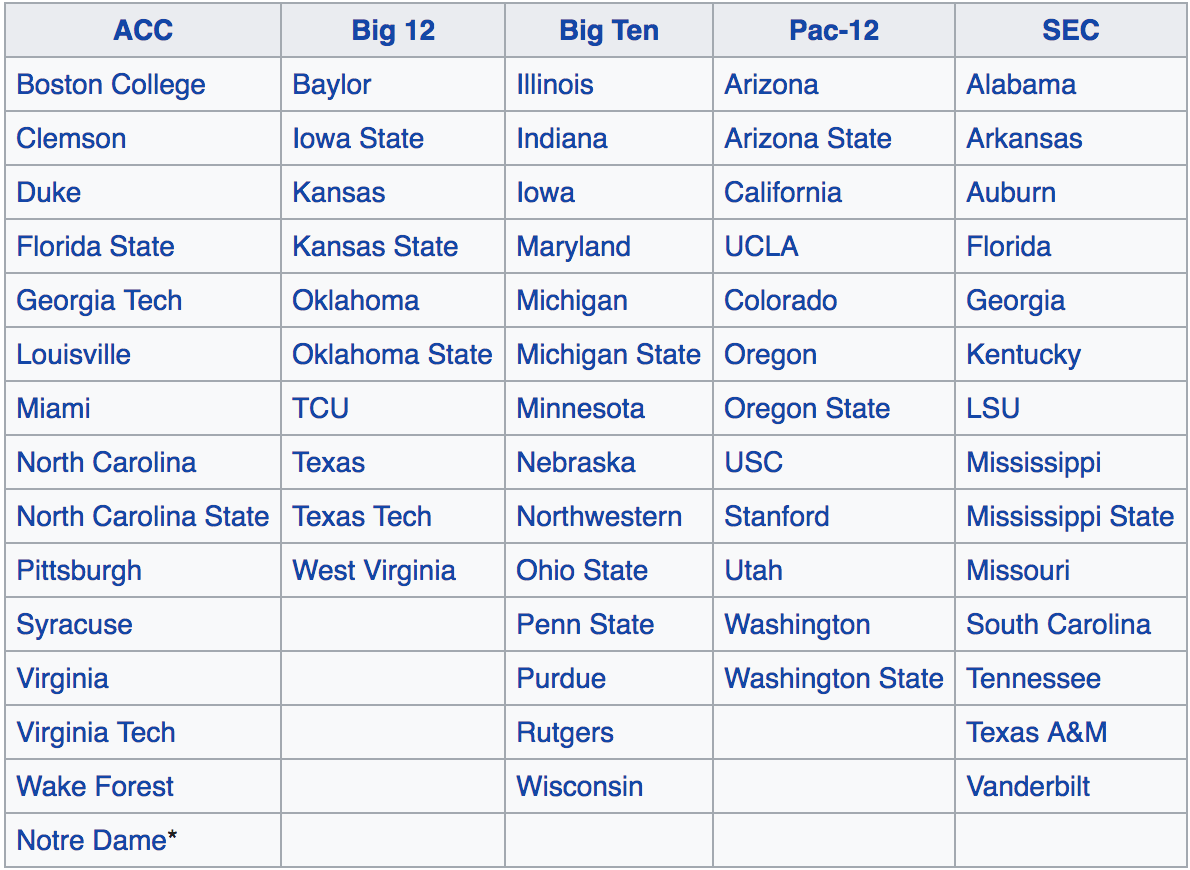

*Notre Dame, technically an independent, is affiliated with the ACC in that they are scheduled for 5 games a year against ACC teams. For the purposes of this research, they will be considered an ACC team.

**The Group of 5 conferences make up the rest of the FBS Division 1 field, and are generally considered to be programs of lower quality than those in the Power 5. They have never placed a team into the CFP, and have no National Champions in the modern era. They are:

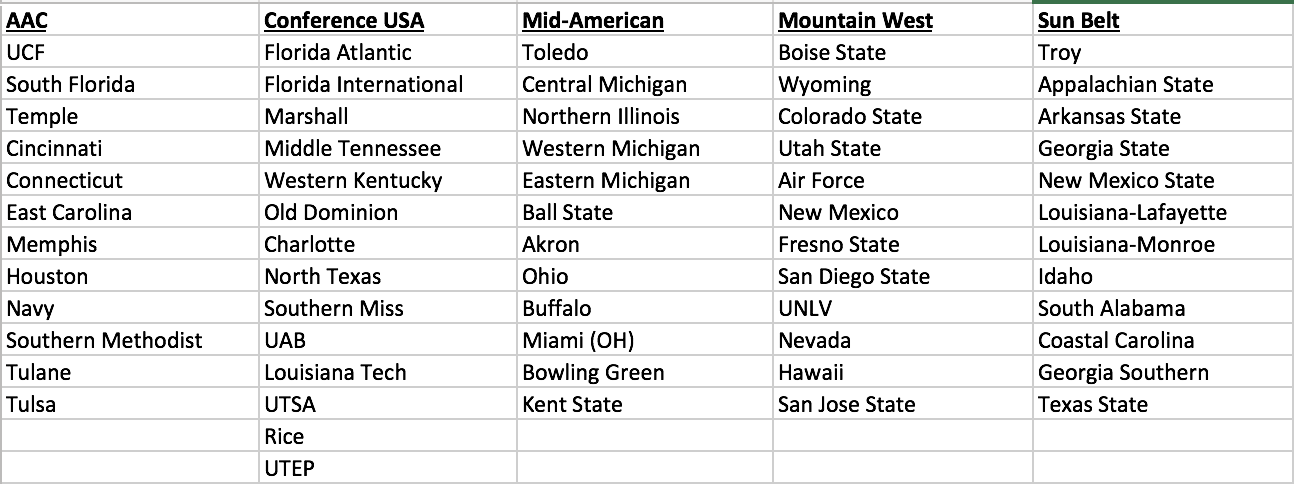

*Several teams exist outside of these 10 conferences as independents: for the purposes of this analysis, these teams (with the exceptions of the aforementioned Notre Dame) will be treated as Group of 5 teams. They are:

    - US Military Academy (Army)
    - Liberty University
    - New Mexico State University
    - University of Massachusetts Amherst (UMass)
    - Brigham Young University (BYU)


### Hypotheses:

- Q1: Does having good college stats imply a higher likelihood of success in the NFL? Does this relationship differ for players who played against 'top' (Power 5 conference) competition vs. second-tier and third-tier competition (Group of 5 conferences, FCS)? Do better stats always lead to better draft positions?
            
    - While this may seem like an obvious yes, my time as a fan of college and NFL football has taught me that this assumption does not always hold true. I predict that having above-average stats will indeed indicate a higher likelihood of success, but only for about 50 - 60% of players. Additionally, above-average stats will be a much stronger predictor for players on Power 5 teams than those on Group of 5 teams. Finally, I feel that better stats will have minimal impact on draft position, with the exception of those players drafted in  the first round -  since a first round selection of a RB is a large investment.
          
          
- Q2: What statistics are better predictors of making a successful transition to the NFL?
    
     - Yards per Carry, Yards per Reception, Competition level, and Height/Weight will be the biggest predictors, since having high yards per carry and yards per reception indicates an efficient level of statistical production with the players' given opportunities, playing against a high competition level likely eases the players' transition to the highest competition level in the sport, and Height and Weight are good indicators of whether the player has the necessary size/strenght, etc. to succeed against professional opponents.

#### Initial Imports:

In [1]:
import requests
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Imports and Cleaning:

** Loop through list of year-labelled csv's. Read in player info, rushing statistics and receiving statistics, and merge the three yearly DataFrames with the master DataFrame (so that it contains all the information for each players' total statistics for each individual year that they played - meaning that a player may appear multiple times, depending on the number of years they played in college) **

In [2]:
years = list(range(2005,2014))
firstYear = years.pop()
df_player = pd.read_csv(str(firstYear)+'_player'+'.csv').set_index('Player Code')
df_player['Name'] = df_player['First Name'] + ' ' + df_player['Last Name']
df_player=df_player.drop(labels=['First Name', 'Last Name'], axis=1)
df_player = df_player.drop(labels=['Uniform Number', 'Home Town', 'Home State', 'Home State', 'Home Country', 'Last School'], axis=1)
df_rush = pd.read_csv(str(firstYear)+'_rush'+'.csv').drop(labels=['Game Code', 'Play Number', 'Team Code'], axis=1)
df_rush = df_rush.groupby(by='Player Code').sum().reset_index()
df_rush.columns = ['Player Code', 'Rush_Attempts', 'Rush_Yards', 'Rush_TD', 'Rush_1stD', 'Sack', 'Rush_Fumble', 'Rush_Fumble_Lost', 'Rush_Safety']
df_reception = pd.read_csv(str(firstYear)+'_reception'+'.csv').drop(labels=['Game Code', 'Play Number', 'Team Code'], axis=1)
df_reception = df_reception.groupby(by='Player Code').sum().reset_index()
df_reception.columns = ['Player Code', 'Receptions', 'Rec_Yards', 'Rec_TD', 'Rec_1stD', 'Rec_Fumble', 'Rec_Fumble_Lost', 'Rec_Safety']
df_all = pd.merge(df_player,df_rush, left_index = True, right_on='Player Code').set_index('Player Code')
df_all = pd.merge(df_all,df_reception, left_index = True, right_on='Player Code', how='outer')
df_all['Year'] = firstYear
df_all = df_all.dropna(subset=['Position'], axis=0)
df_all.sort_values(by='Player Code')
while years:
    year = years.pop()
    dx = pd.read_csv(str(year)+'_player'+'.csv', encoding = "ISO-8859-1").set_index('Player Code')
    dx['Name'] = dx['First Name'] + ' ' + dx['Last Name']
    dx=dx.drop(labels=['First Name', 'Last Name'], axis=1)
    dx = dx.drop(labels=['Uniform Number', 'Home Town', 'Home State', 'Home State', 'Home Country', 'Last School'], axis=1)
    dy = pd.read_csv(str(year)+'_rush'+'.csv', encoding = "ISO-8859-1").drop(labels=['Game Code', 'Play Number', 'Team Code'], axis=1)
    dy = dy.groupby(by='Player Code').sum().reset_index()
    dy.columns = ['Player Code', 'Rush_Attempts', 'Rush_Yards', 'Rush_TD', 'Rush_1stD', 'Sack', 'Rush_Fumble', 'Rush_Fumble_Lost', 'Rush_Safety']
    dz = pd.read_csv(str(year)+'_reception'+'.csv', encoding = "ISO-8859-1").drop(labels=['Game Code', 'Play Number', 'Team Code'], axis=1)
    dz = dz.groupby(by='Player Code').sum().reset_index()
    dz.columns = ['Player Code', 'Receptions', 'Rec_Yards', 'Rec_TD', 'Rec_1stD', 'Rec_Fumble', 'Rec_Fumble_Lost', 'Rec_Safety']
    merged = pd.merge(dx,dy, left_index = True, right_on='Player Code').set_index('Player Code')
    merged = pd.merge(merged,dz, left_index = True, right_on='Player Code')
    merged['Year'] = year
    merged = merged.dropna(subset=['Position'], axis=0)
    df_all = pd.concat([df_all, merged]).reset_index(drop=True)


** Create separate DataFrame with player info and drop duplicates while keeping their most recent info. Group the original DataFrame by player to get their career statistical totals. Then merge the player info with their career totals. **

In [3]:
player_info = df_all[['Player Code', "Name", "Height", "Weight", "Position", "Team Code"]].drop_duplicates(subset=['Player Code'],keep='last').set_index("Player Code").sort_index()

In [4]:
df_all = df_all.groupby("Player Code").sum().iloc[:,3:21].drop(labels='Year', axis=1)

In [5]:
df_p = pd.merge(player_info,df_all, left_index=True, right_index=True)

** Add team, conference, and subdivision info for each player **

In [6]:
teams = pd.read_csv('team.csv').set_index('Team Code')
conferences = pd.read_csv('conference.csv').set_index('Conference Code')
teams_conf = pd.merge(teams,conferences, left_on ='Conference Code', right_index=True, how='outer').drop(labels=['Conference Code'], axis=1)
teams_conf.columns= ['Team', 'Conference', 'Subdivision']

In [7]:
df_fin = pd.merge(df_p, teams_conf, left_on='Team Code', right_index=True).drop(labels='Team Code', axis=1)
df_fin.head(5)

,Name,Height,Weight,Position,Rush_Attempts,Rush_Yards,Rush_TD,Rush_1stD,Sack,Rush_Fumble,...,Receptions,Rec_Yards,Rec_TD,Rec_1stD,Rec_Fumble,Rec_Fumble_Lost,Rec_Safety,Team,Conference,Subdivision
Player Code,,,,,,,,,,,,,,,,,,,,,
1,Ryan Bohm,NaN,NaN,TB,101.0,360.0,4.0,20.0,0.0,1.0,...,25.0,201.0,0.0,8.0,2.0,1.0,0.0,Utah State,Mountain West Conference,FBS
59102,Jimmy Bohm,NaN,NaN,FB,12.0,52.0,1.0,4.0,0.0,0.0,...,7.0,38.0,1.0,3.0,0.0,0.0,0.0,Utah State,Mountain West Conference,FBS
59133,Tony Pennyman,NaN,NaN,WR,9.0,44.0,0.0,2.0,0.0,0.0,...,63.0,741.0,5.0,36.0,1.0,1.0,0.0,Utah State,Mountain West Conference,FBS
59137,Kevin Robinson,NaN,NaN,WR,35.0,165.0,1.0,6.0,0.0,0.0,...,134.0,1883.0,18.0,79.0,0.0,0.0,0.0,Utah State,Mountain West Conference,FBS
75641,Marcus Crawford,NaN,NaN,RB,13.0,30.0,0.0,2.0,0.0,0.0,...,1.0,6.0,0.0,0.0,0.0,0.0,0.0,Utah State,Mountain West Conference,FBS


** Clean duplicate or near-duplicate position codes : TB = Tailback, FB = Fullback (essentially the same as RB - Running Back) **

In [8]:
df_fin.loc[:,'Position'].replace('TB', 'RB', inplace=True)
df_fin.loc[:,'Position'].replace('FB', 'RB', inplace=True)

** Get NFL draft csv, limit to years corresponding with the college data, and clean unnecessary statistics **

In [9]:
df_nfl = pd.read_csv('nfl_draft.csv')
df_nfl = df_nfl.drop(labels=['Pos', 'Tkl', 'Def_Int', 'Sk', 'Unnamed: 32'], axis=1)

In [10]:
#Limit drafts to 2006 thru 2014
drafts = df_nfl[(df_nfl['Year'] >= 2006) & (df_nfl['Year'] <= 2014)]
drafts = drafts[(drafts['Position Standard'] == 'RB')]

In [11]:
drafts = drafts.drop(labels=['Player_Id', 'College/Univ', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Pass_Int', 'Cmp'], axis=1)
drafts.head(5)

,Year,Rnd,Pick,Tm,Player,Position Standard,First4AV,Age,To,AP1,...,St,CarAV,DrAV,G,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds
309,2014,2.0,54,TEN,Bishop Sankey,RB,6,22.0,2015.0,0,...,1,6.0,6.0,29.0,199.0,762.0,3.0,32.0,272.0,1.0
310,2014,2.0,55,CIN,Jeremy Hill,RB,16,21.0,2016.0,0,...,2,16.0,16.0,42.0,580.0,2541.0,26.0,51.0,356.0,1.0
312,2014,2.0,57,SFO,Carlos Hyde,RB,5,23.0,2016.0,0,...,0,5.0,5.0,29.0,339.0,1332.0,13.0,39.0,211.0,0.0
324,2014,3.0,69,TAM,Charles Sims,RB,10,24.0,2016.0,0,...,0,10.0,10.0,28.0,214.0,830.0,2.0,84.0,863.0,5.0
330,2014,3.0,75,STL,Tre Mason,RB,7,21.0,2015.0,0,...,1,7.0,7.0,25.0,254.0,972.0,5.0,34.0,236.0,1.0


** Create joint college-NFL DataFrame for all college players drafted in this timeframe **

In [12]:
draft_names = drafts[['Player']].Player
dnames = list(draft_names)

In [13]:
drafted_cfb = df_fin[df_fin['Name'].isin(dnames)]

In [14]:
drafted_cfb = drafted_cfb.drop(labels=['Position'], axis=1)
drafted_cfb.columns = ['Name', 'Height', 'Weight', 'cfb_Rush_Attempts', 'cfb_Rush_Yards',
       'cfb_Rush_TD', 'cfb_Rush_1stD', 'cfb_Sack', 'cfb_Rush_Fumble', 'cfb_Rush_Fumble_Lost',
       'cfb_Rush_Safety', 'cfb_Receptions', 'cfb_Rec_Yards', 'cfb_Rec_TD', 'cfb_Rec_1stD',
       'cfb_Rec_Fumble', 'cfb_Rec_Fumble_Lost', 'cfb_Rec_Safety', 'cfb_Team', 'cfb_Conference',
       'cfb_Subdivision']

In [15]:
nfl_cfb = pd.merge(drafted_cfb, drafts, left_on='Name', right_on='Player')

In [16]:
nfl_cfb.head(5)

,Name,Height,Weight,cfb_Rush_Attempts,cfb_Rush_Yards,cfb_Rush_TD,cfb_Rush_1stD,cfb_Sack,cfb_Rush_Fumble,cfb_Rush_Fumble_Lost,...,St,CarAV,DrAV,G,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds
0,Robert Turbin,70.0,210.0,562.0,3298.0,40.0,133.0,0.0,4.0,1.0,...,0,12.0,12.0,68.0,303.0,1200.0,4.0,66.0,545.0,2.0
1,Kerwynn Williams,69.0,185.0,380.0,2505.0,22.0,101.0,0.0,4.0,2.0,...,0,2.0,0.0,17.0,80.0,388.0,1.0,4.0,27.0,0.0
2,Michael Smith,69.0,187.0,184.0,1313.0,15.0,53.0,0.0,3.0,2.0,...,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Michael Smith,72.0,201.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Michael Smith,NaN,NaN,359.0,2018.0,16.0,94.0,0.0,5.0,3.0,...,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


** Create numeric values for conference and subdivision (for competition level analysis) **

In [17]:
Pfive = ['Atlantic Coast Conference', 'Big 12 Conference', 'Big Ten Conference', 'Pac-12 Conference', 'Southeastern Conference']
Gfive = ['American Athletic Conference', 'Conference USA', 'Independent', 'Mid-American Conference', 'Mountain West Conference', 'Sun Belt Conference']
def conference_rank(x):
    #print(x)
    if x in Pfive:
        return 1
    elif x in Gfive: 
        return 2
    else:
        return 3
    
pfive = {'Atlantic Coast Conference':1 , 'Big 12 Conference':2, 'Big Ten Conference':3, 'Pac-12 Conference':4, 'Southeastern Conference':5}
gfive = {'American Athletic Conference':6, 'Conference USA':7, 'Independent':8, 'Mid-American Conference':9, 'Mountain West Conference':10, 'Sun Belt Conference':11}
def conf_dum(x):
    if x in pfive:
        return pfive[x]
    elif x in gfive:
        return gfive[x]
    else:
        return 12

** Drop duplicates, create additional features for analysis (college conference competition level; yards per rush, yards per reception, Touchdowns per touch for college and NFL; touchdowns per play, touchdowns per rush, fumbles per rush, fumbles per touch for college), reorder columns, and drop any players who did not record any statistics in the NFL (players who didn't actually play). **

In [18]:
nfl_cfb = nfl_cfb.drop_duplicates(subset=['Name', 'Year', 'Tm'], keep='first')
nfl_cfb.columns = ['Name', 'Height', 'Weight', 'cfb_Rush_Attempts', 'cfb_Rush_Yards',
       'cfb_Rush_TD', 'cfb_Rush_1stD', 'cfb_Sack', 'cfb_Rush_Fumble',
       'cfb_Rush_Fumble_Lost', 'cfb_Rush_Safety', 'cfb_Receptions',
       'cfb_Rec_Yards', 'cfb_Rec_TD', 'cfb_Rec_1stD', 'cfb_Rec_Fumble',
       'cfb_Rec_Fumble_Lost', 'cfb_Rec_Safety', 'cfb_Team', 'cfb_Conference',
       'cfb_Subdivision', 'Year', 'Rnd', 'Pick', 'Tm', 'Player',
       'Position', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St',
       'CarAV', 'DrAV', 'G', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rec',
       'Rec_Yds', 'Rec_Td']


In [19]:
nfl_cfb['cfb_YPA'] = nfl_cfb['cfb_Rush_Yards']/nfl_cfb['cfb_Rush_Attempts']
nfl_cfb['cfb_YPC'] = nfl_cfb['cfb_Rec_Yards']/nfl_cfb['cfb_Receptions']
nfl_cfb['cfb_TD_per_play'] = (nfl_cfb['cfb_Rush_TD'] + nfl_cfb['cfb_Rec_TD'])/(nfl_cfb['cfb_Rush_Attempts'] + nfl_cfb['cfb_Receptions'])
nfl_cfb['cfb_Fum_touch'] = (nfl_cfb['cfb_Rush_Fumble'] + nfl_cfb['cfb_Rec_Fumble'])/(nfl_cfb['cfb_Rush_Attempts'] + nfl_cfb['cfb_Receptions'])
nfl_cfb['Rush_YPA'] = nfl_cfb['Rush_Yds']/nfl_cfb['Rush_Att']
nfl_cfb['Rec_YPC'] = nfl_cfb['Rec_Yds']/nfl_cfb['Rec']
nfl_cfb['TD_per_play'] = (nfl_cfb['Rush_TD'] + nfl_cfb['Rec_Td'])/(nfl_cfb['Rush_Att'] + nfl_cfb['Rec'])
nfl_cfb['cfb_Conf_level'] = nfl_cfb['cfb_Conference'].apply(func=conference_rank)
nfl_cfb['cfb_RushTD_per_carry'] = nfl_cfb['cfb_Rush_TD']/nfl_cfb['cfb_Rush_Attempts']
nfl_cfb['cfb_Fum_per_carry'] = nfl_cfb['cfb_Rush_Fumble']/nfl_cfb['cfb_Rush_Attempts']
#nfl_cfb['cfb_Conf_level'] = pd.Series(conference_rank(nfl_cfb.cfb_Conference))
nfl_cfb.columns

Index(['Name', 'Height', 'Weight', 'cfb_Rush_Attempts', 'cfb_Rush_Yards',
       'cfb_Rush_TD', 'cfb_Rush_1stD', 'cfb_Sack', 'cfb_Rush_Fumble',
       'cfb_Rush_Fumble_Lost', 'cfb_Rush_Safety', 'cfb_Receptions',
       'cfb_Rec_Yards', 'cfb_Rec_TD', 'cfb_Rec_1stD', 'cfb_Rec_Fumble',
       'cfb_Rec_Fumble_Lost', 'cfb_Rec_Safety', 'cfb_Team', 'cfb_Conference',
       'cfb_Subdivision', 'Year', 'Rnd', 'Pick', 'Tm', 'Player', 'Position',
       'First4AV', 'Age', 'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'G',
       'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rec', 'Rec_Yds', 'Rec_Td',
       'cfb_YPA', 'cfb_YPC', 'cfb_TD_per_play', 'cfb_Fum_touch', 'Rush_YPA',
       'Rec_YPC', 'TD_per_play', 'cfb_Conf_level', 'cfb_RushTD_per_carry',
       'cfb_Fum_per_carry'],
      dtype='object')

In [20]:
new_cols = ['Name', 'Position', 'Year', 'Rnd', 'Pick', 'Tm', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St','Height', 'Weight', 'cfb_Rush_Attempts', 'cfb_Rush_Yards', 'cfb_YPA',
       'cfb_Rush_TD','cfb_RushTD_per_carry', 'cfb_Rush_1stD', 'cfb_Sack', 'cfb_Rush_Fumble',
       'cfb_Rush_Fumble_Lost','cfb_Fum_per_carry', 'cfb_Rush_Safety', 'cfb_Receptions',
       'cfb_Rec_Yards','cfb_YPC', 'cfb_Rec_TD', 'cfb_Rec_1stD', 'cfb_Rec_Fumble',
       'cfb_Rec_Fumble_Lost', 'cfb_Rec_Safety','cfb_TD_per_play', 'cfb_Team', 'cfb_Conference',
       'cfb_Subdivision', 'cfb_Conf_level', 'G', 'CarAV', 'DrAV', 'Rush_Att', 'Rush_Yds', 'Rush_YPA', 'Rush_TD', 'Rec',
       'Rec_Yds','Rec_YPC', 'Rec_Td','TD_per_play']
nfl_cfb = nfl_cfb.ix[:, new_cols]

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [21]:
played = nfl_cfb[(nfl_cfb.Rush_Att.notnull())|(nfl_cfb.Rec.notnull())]

In [22]:
#nfl_cfb[['Name', 'cfb_Team', 'cfb_Conference', 'cfb_Conf_level']]
played['To'].fillna(value=2019, inplace=True)
played['To'] = played['To'].astype(int)

/Users/zimmer/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
played.fillna(0, inplace=True)

/Users/zimmer/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [24]:
def z_score(x):
    for y in x.describe().columns:
        mean = np.mean(x[y])
        std = np.std(x[y])
        x[y] = (x[y]-mean)/std
    return x

In [25]:
set_cols = ['Name', 'Position', 'Year', 'Rnd', 'Pick', 'Tm', 'Age',
       'To', 'Height', 'Weight', 'cfb_Rush_Attempts',
       'cfb_Rush_Yards', 'cfb_YPA', 'cfb_Rush_TD', 'cfb_RushTD_per_carry',
       'cfb_Rush_1stD', 'cfb_Sack', 'cfb_Rush_Fumble', 'cfb_Rush_Fumble_Lost',
       'cfb_Fum_per_carry', 'cfb_Rush_Safety', 'cfb_Receptions',
       'cfb_Rec_Yards', 'cfb_YPC', 'cfb_Rec_TD', 'cfb_Rec_1stD',
       'cfb_Rec_Fumble', 'cfb_Rec_Fumble_Lost', 'cfb_Rec_Safety',
       'cfb_TD_per_play', 'cfb_Team', 'cfb_Conference', 'cfb_Subdivision',
       'cfb_Conf_level', 'G','First4AV', 'CarAV', 'DrAV', 'Rush_Att', 'Rush_Yds',
       'Rush_YPA', 'Rush_TD', 'Rec', 'Rec_Yds', 'Rec_YPC', 'Rec_Td',
       'TD_per_play', 'AP1', 'PB', 'St']
played = played.ix[:, set_cols]
played.head(5)

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


,Name,Position,Year,Rnd,Pick,Tm,Age,To,Height,Weight,...,Rush_YPA,Rush_TD,Rec,Rec_Yds,Rec_YPC,Rec_Td,TD_per_play,AP1,PB,St
0,Robert Turbin,RB,2012,4.0,106,SEA,22.0,2016,70.0,210.0,...,3.960396,4.0,66.0,545.0,8.257576,2.0,0.016260,0,0,0
1,Kerwynn Williams,RB,2013,7.0,230,IND,22.0,2016,69.0,185.0,...,4.850000,1.0,4.0,27.0,6.750000,0.0,0.011905,0,0,0
5,Ryan Williams,RB,2011,2.0,38,ARI,21.0,2012,0.0,0.0,...,2.827586,0.0,7.0,44.0,6.285714,0.0,0.000000,0,0,0
9,Le'Ron McClain,RB,2007,4.0,137,BAL,22.0,2013,0.0,0.0,...,3.700565,13.0,94.0,557.0,5.925532,3.0,0.035714,1,2,6
10,Glen Coffee,RB,2009,3.0,74,SFO,22.0,2009,0.0,0.0,...,2.722892,1.0,11.0,76.0,6.909091,0.0,0.010638,0,0,0


# Exploratory Analysis

### NFL/College Data

 - Explore the breakdown of how many "successful" NFL players are in the dataset, based on pro bowl, all pro nominations, starts, etc.
 - Distributional analysis

In [26]:
probowl = played.groupby('PB').count()[['Name']]

probowl = probowl.append(probowl.sum(numeric_only=True), ignore_index=True)
probowl = probowl.rename({6:7, 7:"Total"})
probowl.loc[6] = 0
probowl = probowl.reindex([0,1,2,3,4,5,6,7,'Total'])
probowl['perc'] = (probowl.iloc[0:8]/probowl.loc['Total']) * 100
probowl['perc']['Total'] = (probowl.iloc[1:8][['Name']].sum(numeric_only=True)/probowl.loc['Total','Name'])*100
probowl

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,perc
0,136,84.472050
1,12,7.453416
2,6,3.726708
3,3,1.863354
4,2,1.242236
5,1,0.621118
6,0,0.000000
7,1,0.621118
Total,161,15.527950


Text(0.5,1,'Pro Bowl Selections')

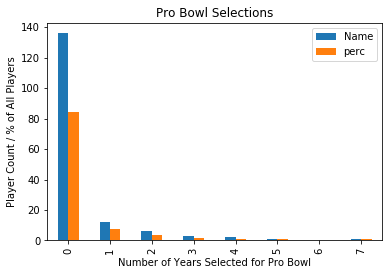

In [27]:
probowl.iloc[0:8].plot.bar()
plt.xlabel('Number of Years Selected for Pro Bowl')
plt.ylabel('Player Count / % of All Players')
plt.title('Pro Bowl Selections')

In [28]:
ap = played.groupby('AP1').count()[['Name']]

ap = ap.append(ap.sum(numeric_only=True), ignore_index=True)
ap = ap.rename({3:4, 4:"Total"})
ap.loc[3] = 0
ap = ap.reindex([0,1,2,3,4,'Total'])
ap['perc'] = (ap.iloc[0:5]/ap.loc['Total']) * 100
ap['perc']['Total'] = (ap.iloc[1:5][['Name']].sum(numeric_only=True)/ap.loc['Total','Name'])*100
ap

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,perc
0,150,93.167702
1,8,4.968944
2,2,1.242236
3,0,0.000000
4,1,0.621118
Total,161,6.832298


Text(0.5,1,'All-Pro Selections')

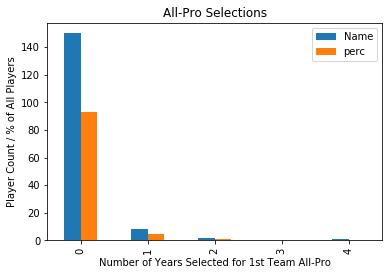

In [29]:
ap.iloc[0:5].plot.bar()
plt.xlabel('Number of Years Selected for 1st Team All-Pro')
plt.ylabel('Player Count / % of All Players')
plt.title('All-Pro Selections')

In [30]:
st = played.copy()
#st['St'] = st['St']/16
st = st.groupby('St').count()[['Name']]
st = st.append(st.sum(numeric_only=True), ignore_index=True)
st = st.rename({10:"Total"})
st['perc'] = (st.iloc[0:10]/st.loc['Total']) * 100
st['perc']['Total'] = (st.iloc[1:10][['Name']].sum(numeric_only=True)/st.loc['Total','Name'])*100
st

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Name,perc
0,93,57.763975
1,32,19.875776
2,11,6.832298
3,7,4.347826
4,8,4.968944
5,2,1.242236
6,4,2.484472
7,2,1.242236
8,1,0.621118
9,1,0.621118


Text(0.5,1,'Years as Primary Starter')

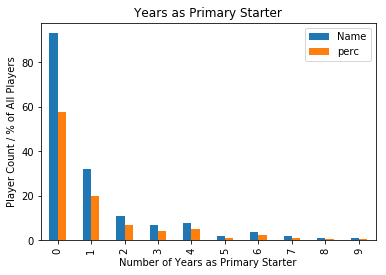

In [31]:
st.iloc[0:10].plot.bar()
plt.xlabel('Number of Years as Primary Starter')
plt.ylabel('Player Count / % of All Players')
plt.title('Years as Primary Starter')

In [32]:
#longer than average career (3 years, 48 games)
succ = played[played['G'] > 48]
(len(succ)/len(played)) * 100

44.099378881987576

In [33]:
# more than double average career length (>6 years, 96 games)
highly = played[played['G'] > 96]
(len(highly)/len(played)) * 100

9.316770186335404

In [34]:
# create dataframe of z-score normalized joint NFL/college data for use in regression analysis

z_1 = played.copy()
z_1 = z_1.set_index('Name')
z_2 = z_1[['Position', 'Year', 'Rnd', 'Pick', 'Tm', 'Age', 'To']]
z_3 = z_1.loc[:,'Height':]
z_played = z_score(z_3)
z_played = pd.merge(z_2, z_played, left_index=True, right_index=True)
z_played.head(5)

,Position,Year,Rnd,Pick,Tm,Age,To,Height,Weight,cfb_Rush_Attempts,...,Rush_YPA,Rush_TD,Rec,Rec_Yds,Rec_YPC,Rec_Td,TD_per_play,AP1,PB,St
Name,,,,,,,,,,,,,,,,,,,,,
Robert Turbin,RB,2012,4.0,106,SEA,22.0,2016,0.911562,0.958099,0.656335,...,0.112695,-0.453589,-0.110837,-0.079567,0.287649,-0.092076,-0.567079,-0.228665,-0.339298,-0.594306
Kerwynn Williams,RB,2013,7.0,230,IND,22.0,2016,0.883442,0.719375,-0.123580,...,1.051425,-0.641322,-0.785455,-0.776229,-0.376883,-0.631136,-0.793574,-0.228665,-0.339298,-0.594306
Ryan Williams,RB,2011,2.0,38,ARI,21.0,2012,-1.056881,-1.047183,-0.740656,...,-1.082672,-0.703899,-0.752812,-0.753366,-0.581538,-0.631136,-1.412661,-0.228665,-0.339298,-0.594306
Le'Ron McClain,RB,2007,4.0,137,BAL,22.0,2013,-1.056881,-1.047183,-1.670555,...,-0.161485,0.109608,0.193829,-0.063428,-0.740305,0.177455,0.444599,2.072275,1.722096,2.743482
Glen Coffee,RB,2009,3.0,74,SFO,22.0,2009,-1.056881,-1.047183,0.004977,...,-1.193148,-0.641322,-0.709289,-0.710329,-0.306757,-0.631136,-0.859435,-0.228665,-0.339298,-0.594306


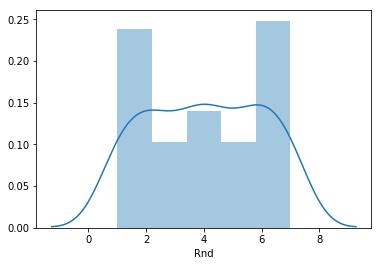

In [35]:
sns.distplot(z_played.Rnd, kde=True)

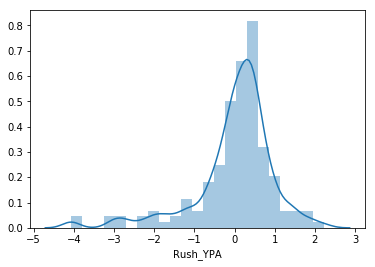

In [36]:
sns.distplot(z_played.Rush_YPA, kde=True)

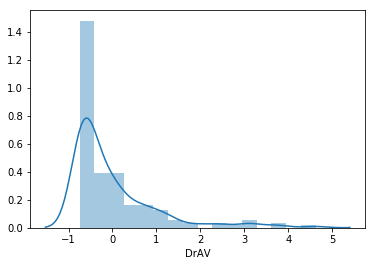

In [37]:
sns.distplot(z_played.DrAV, kde=True)

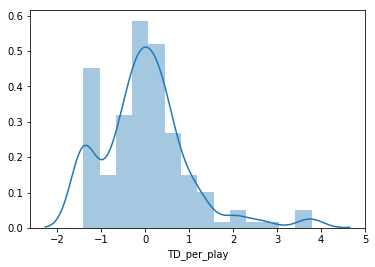

In [38]:
sns.distplot(z_played.TD_per_play, kde=True)

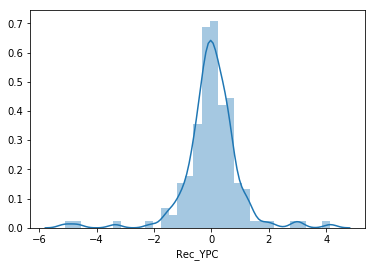

In [39]:
sns.distplot(z_played.Rec_YPC, kde=True)

### All College RB Data

- explore breakdown of how many players in dataset were drafted, where they came from, etc
- distributional analysis

** Create dummy variable function for creation of dummy variable for draft status of each plsyer **

In [40]:
def draft_dummy(x):
    if x in dnames:
        return 'Pro'
    else:
        return 'No'

** Create draft status dummy variable, conference competition level values, create pivot table for exploratory analysis **

In [41]:
df_fin['wasDrafted'] = df_fin['Name'].apply(func=draft_dummy)
df_fin['conf_lev'] = df_fin['Conference'].apply(func=conference_rank)
df_fin['Conference_num'] = df_fin['Conference'].apply(func=conf_dum)
result_counts = pd.pivot_table(df_fin, values='Name', index='wasDrafted', columns='Subdivision', aggfunc='count')
result_counts['row_total'] = result_counts['FBS'] + result_counts['FCS']
result_c = result_counts.copy()
result_c['all_total'] = result_c['row_total'].sum()
result_c = result_c.drop(labels=['FBS', 'FCS'], axis=1)
result_c['percent_drafted'] = result_c['row_total']/result_c['all_total']
result_counts

Subdivision,FBS,FCS,row_total
wasDrafted,,,
No,4776,1314,6090
Pro,191,11,202


In [42]:
cfdr = pd.pivot_table(df_fin, values='Name', index='Subdivision', columns='wasDrafted', aggfunc='count')
cfdr['draft_tot'] = cfdr.sum(1)
cfdr = cfdr.append(cfdr.sum(numeric_only=True), ignore_index=True)
cfdr = cfdr.rename(index={0: 'FBS', 1:'FCS', 2:'Totals'})
cfdr


wasDrafted,No,Pro,draft_tot
FBS,4776,191,4967
FCS,1314,11,1325
Totals,6090,202,6292


Text(0.5,1,'# of Players Drafted vs # of Players Not Drafted')

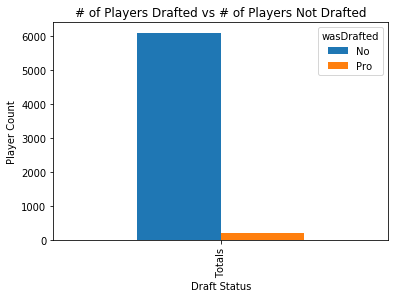

In [43]:
# of all the players in the college dataset, only a very small number were actually drafted

temp = cfdr.loc['Totals']
temp = pd.DataFrame(temp)
temp = temp.drop(labels=['draft_tot'])
temp.T.plot.bar()
plt.xlabel('Draft Status')
plt.ylabel('Player Count')
plt.title('# of Players Drafted vs # of Players Not Drafted')

In [44]:
# Overall percentage of players drafted
202/692

0.29190751445086704

In [45]:
# Percent of players drafted that played in the FBS

cfdr['perc'] = (cfdr['Pro']/cfdr['draft_tot']) * 100
pro_p = (cfdr.loc['FBS', 'Pro']/ 202) * 100
pro_p

94.554455445544548

In [46]:
cfdr['perc']['FBS'] = pro_p
cfdr['perc']['FCS'] = 100 - pro_p
cfdr

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


wasDrafted,No,Pro,draft_tot,perc
FBS,4776,191,4967,94.554455
FCS,1314,11,1325,5.445545
Totals,6090,202,6292,3.210426


Text(0.5,1,'Subdivision Level of All Players in Dataset')

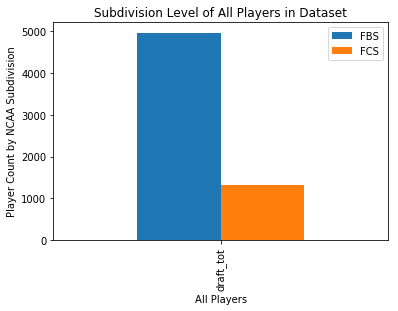

In [47]:
# majority of players in the college dataset are FBS

temp2 = cfdr[['draft_tot']]
temp2 = temp2.loc['FBS':'FCS']
temp2.T.plot.bar()
plt.xlabel('All Players')
plt.ylabel('Player Count by NCAA Subdivision')
plt.title('Subdivision Level of All Players in Dataset')

In [48]:
# create another pivot table to explore competition level splits
confs = pd.pivot_table(df_fin, values='Name', index ='conf_lev', columns='wasDrafted', aggfunc='count')
confs = confs.rename({1:'P5', 2:'G5', 3:'FCS'})
confs['total'] = confs.sum(1)
confs['perc'] = (confs['Pro']/confs['total']) * 100
confs

wasDrafted,No,Pro,total,perc
conf_lev,,,,
P5,2403,144,2547,5.653710
G5,2373,47,2420,1.942149
FCS,1314,11,1325,0.830189


In [49]:
# most players drafted came from the Power 5 conferences

Text(0.5,1,'Conference Level of All Drafted Players ')

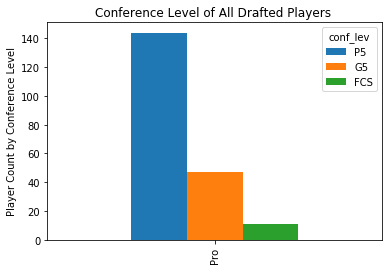

In [50]:
pro = confs[['Pro']]
pro.T.plot.bar()
plt.xlabel('')
plt.ylabel('Player Count by Conference Level')
plt.title('Conference Level of All Drafted Players ')

Text(0.5,1,'Power 5 Players Drafted vs Not Drafted')

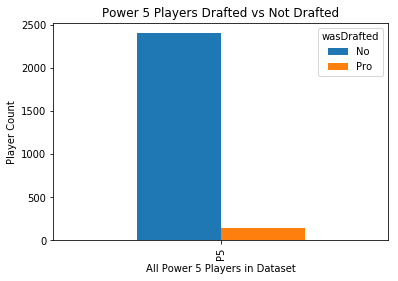

In [51]:
pf = confs.loc['P5'][['No', 'Pro']]

pd.DataFrame(pf).T.plot.bar()
plt.xlabel('All Power 5 Players in Dataset')
plt.ylabel('Player Count')
plt.title('Power 5 Players Drafted vs Not Drafted')

In [52]:
# create dataframe of z-score normalized college data for use in regression analysis
norm_cfb = df_fin.copy()
norm_cfb = z_score(norm_cfb)
norm_cfb.head(5)

,Name,Height,Weight,Position,Rush_Attempts,Rush_Yards,Rush_TD,Rush_1stD,Sack,Rush_Fumble,...,Rec_1stD,Rec_Fumble,Rec_Fumble_Lost,Rec_Safety,Team,Conference,Subdivision,wasDrafted,conf_lev,Conference_num
Player Code,,,,,,,,,,,,,,,,,,,,,
1,Ryan Bohm,NaN,NaN,RB,0.255077,0.062605,0.146728,0.134657,-0.222731,-0.116171,...,-0.251158,2.263946,1.550083,-0.035636,Utah State,Mountain West Conference,FBS,No,0.255531,0.793983
59102,Jimmy Bohm,NaN,NaN,RB,-0.420242,-0.393059,-0.293667,-0.370511,-0.222731,-0.518233,...,-0.475787,-0.444642,-0.377566,-0.035636,Utah State,Mountain West Conference,FBS,No,0.255531,0.793983
59133,Tony Pennyman,NaN,NaN,WR,-0.443006,-0.404895,-0.440465,-0.433657,-0.222731,-0.518233,...,1.006764,0.909652,1.550083,-0.035636,Utah State,Mountain West Conference,FBS,No,0.255531,0.793983
59137,Kevin Robinson,NaN,NaN,WR,-0.245722,-0.225884,-0.293667,-0.307365,-0.222731,-0.518233,...,2.938572,-0.444642,-0.377566,-0.035636,Utah State,Mountain West Conference,FBS,No,0.255531,0.793983
75641,Marcus Crawford,NaN,NaN,RB,-0.412655,-0.425607,-0.440465,-0.433657,-0.222731,-0.518233,...,-0.610564,-0.444642,-0.377566,-0.035636,Utah State,Mountain West Conference,FBS,No,0.255531,0.793983


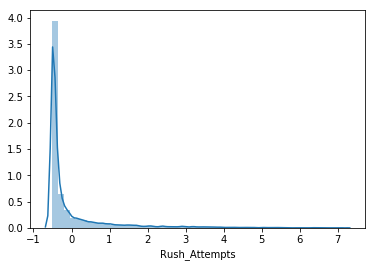

In [53]:
sns.distplot(norm_cfb.Rush_Attempts, kde=True)

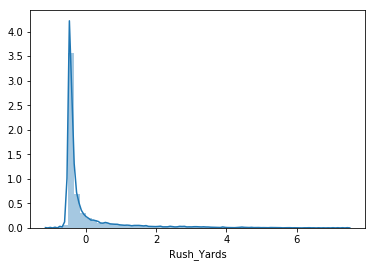

In [54]:
sns.distplot(norm_cfb.Rush_Yards, kde=True)

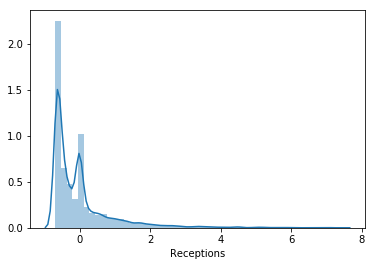

In [55]:
sns.distplot(norm_cfb.Receptions.fillna(0), kde=True)

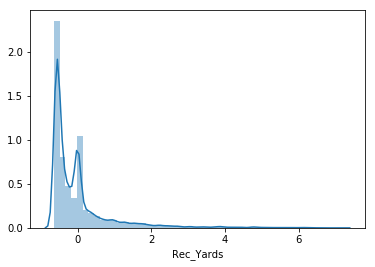

In [56]:
sns.distplot(norm_cfb.Rec_Yards.fillna(0), kde=True)

### Conclusion: None of the College or NFL/College data is normal

## Correlation with non-normalized data

In this section, I began by using the non-normalized NFL/College RB data to create a correlation table using Spearman's method (since the variables are non-parametric, and spearman's is less sensitive to rank differences than Kendall's). From this table, I built a dictionary of the top 5 college statistic correlations to each NFL statistic in order to create OLS regression models to try and predict important NFL statistics based on college performance.

In [57]:
corr = played.loc[:,'Height':].corr(method = 'spearman')
corr_cfb_id = corr.loc['Height': 'cfb_Conf_level', 'G':'TD_per_play']
corr_cfb_id

,G,First4AV,CarAV,DrAV,Rush_Att,Rush_Yds,Rush_YPA,Rush_TD,Rec,Rec_Yds,Rec_YPC,Rec_Td,TD_per_play
Height,-0.245071,-0.143048,-0.178953,-0.137265,-0.195766,-0.189308,-0.127564,-0.152183,-0.167168,-0.174977,-0.033893,-0.104019,0.026860
Weight,-0.239743,-0.144431,-0.181712,-0.149702,-0.199709,-0.196389,-0.166485,-0.134239,-0.166813,-0.172245,-0.014404,-0.104139,0.066197
cfb_Rush_Attempts,0.100287,0.227875,0.243247,0.257884,0.296301,0.295445,0.281938,0.260105,0.169188,0.163550,0.031271,0.084482,0.006376
cfb_Rush_Yards,0.117931,0.257600,0.277147,0.296821,0.324742,0.327039,0.321140,0.282592,0.196363,0.189662,0.037034,0.110570,-0.001836
cfb_YPA,0.021147,0.158488,0.171504,0.196811,0.171722,0.189545,0.235517,0.134113,0.083292,0.089434,0.059121,0.111259,-0.043819
cfb_Rush_TD,0.133906,0.311683,0.322411,0.343888,0.373639,0.372957,0.302804,0.330750,0.242295,0.225396,0.018079,0.152706,0.011872
cfb_RushTD_per_carry,-0.005224,0.150264,0.146823,0.167529,0.181034,0.182505,0.085360,0.158988,0.091808,0.057445,-0.086377,0.061159,-0.122814
cfb_Rush_1stD,0.106163,0.241608,0.256660,0.274843,0.312824,0.313782,0.302847,0.279751,0.172700,0.165210,0.024158,0.078450,0.012300
cfb_Sack,-0.039068,0.006098,0.002184,0.037145,0.008544,-0.000025,-0.104148,0.033087,0.048136,0.043038,0.034038,0.046861,0.104587
cfb_Rush_Fumble,0.101667,0.221825,0.245996,0.276483,0.268458,0.266788,0.264782,0.252572,0.150756,0.157071,0.084136,0.173927,0.106261


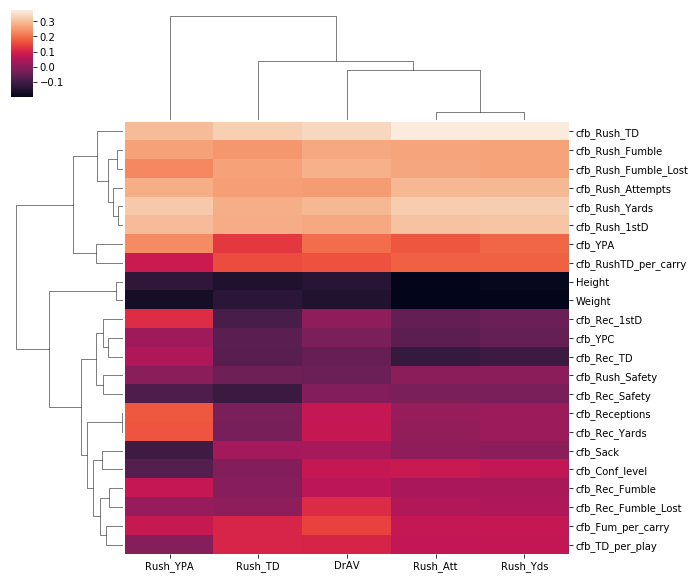

In [58]:
sns.clustermap(corr_cfb_id.loc[:,'DrAV':'Rush_TD'])

In [59]:
feat_topCorr = {}
for row in corr_cfb_id.columns:
    feat_topCorr[row] = corr_cfb_id.sort_values(by= row, ascending = False).ix[0:5,row]

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
pick_corr = played.loc[:, 'Rnd':].corr(method = 'spearman')
pick_corr_clean = pick_corr.loc['Height': 'cfb_Conf_level', 'Rnd':'St']
pick_corr_clean = pick_corr_clean.drop(labels=['Age', 'To'], axis=1)
pick_corr_clean
for row in pick_corr_clean.columns:
    feat_topCorr[row] = pick_corr_clean.sort_values(by= row, ascending = False).ix[0:5,row]

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Regression with non-normalized data

In [61]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Wanted to try DrAV (accumulated value to the team that drafted the player), as this is stat had some of the 
# strongest correlations, and is a good indicator of the overall value a player provided to his drafting team
model1 = smf.ols('DrAV ~ cfb_Rush_TD + cfb_Rush_Yards + cfb_Rush_1stD + cfb_Rush_Fumble_Lost', data=played).fit()
model1.summary()

/Users/zimmer/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.924
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000915
Time:                        10:32:54   Log-Likelihood:                -669.18
No. Observations:                 161   AIC:                             1348.
Df Residuals:                     156   BIC:                             1364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.2520      2.510      2.491      0.014       1.294      11.210
cfb_Rush_TD              0.6291      0.233      2.695      0.008       0.168       1.090
cfb_Rush_Yards          -0.0006      0.005     -0.121      0.904      -0.011       0.010
cfb_Rush_1stD           -0.1188      0.116     -1.027      0.306      -0.348       0.110
cfb_Rush_Fumble_Lost     1.7360      0.648      2.678      0.008       0.456       3.016
==============================================================================
Omnibus:                       72.227   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.916
Skew:                           1.886   Prob(JB):                     5.25e-45
Kurtosis:                       7.021   Cond. No.                     5.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Rush Yards and 1st Downs had high p-values, so I remove them from the model
model1 = smf.ols('DrAV ~ cfb_Rush_TD+cfb_Rush_Fumble_Lost', data=played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.395
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000851
Time:                        10:32:54   Log-Likelihood:                -671.55
No. Observations:                 161   AIC:                             1349.
Df Residuals:                     158   BIC:                             1358.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.5644      2.405      1.898      0.060      -0.185       9.314
cfb_Rush_TD              0.1843      0.102      1.816      0.071      -0.016       0.385
cfb_Rush_Fumble_Lost     1.1469      0.564      2.033      0.044       0.033       2.261
==============================================================================
Omnibus:                       78.313   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.897
Skew:                           1.995   Prob(JB):                     5.44e-55
Kurtosis:                       7.618   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# While not in the top 5 correlations for the DrAV, I wanted to try the rush attempts and receptions to see 
# if the number of touches through the ground or air in college could be good predictors 
model1 = smf.ols('DrAV ~ cfb_Rush_TD+cfb_Rush_Yards+cfb_Receptions+cfb_Rush_Fumble', data=played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.176
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000609
Time:                        10:32:54   Log-Likelihood:                -668.72
No. Observations:                 161   AIC:                             1347.
Df Residuals:                     156   BIC:                             1363.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.0354      2.663      2.267      0.025       0.776      11.295
cfb_Rush_TD         0.6012      0.226      2.655      0.009       0.154       1.049
cfb_Rush_Yards     -0.0061      0.003     -2.124      0.035      -0.012      -0.000
cfb_Receptions     -0.0055      0.041     -0.132      0.895      -0.087       0.076
cfb_Rush_Fumble     1.3239      0.435      3.043      0.003       0.465       2.183
==============================================================================
Omnibus:                       72.331   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.460
Skew:                           1.892   Prob(JB):                     6.60e-45
Kurtosis:                       7.001   Cond. No.                     5.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# p-value for cfb_Receptions > 0.5, so remove it
model1 = smf.ols('DrAV ~ cfb_Rush_TD + cfb_Rush_Yards + cfb_Rush_Fumble', data=played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     6.939
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000205
Time:                        10:32:54   Log-Likelihood:                -668.73
No. Observations:                 161   AIC:                             1345.
Df Residuals:                     157   BIC:                             1358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.9063      2.469      2.392      0.018       1.030      10.782
cfb_Rush_TD         0.5993      0.225      2.660      0.009       0.154       1.044
cfb_Rush_Yards     -0.0062      0.003     -2.168      0.032      -0.012      -0.001
cfb_Rush_Fumble     1.3292      0.432      3.078      0.002       0.476       2.182
==============================================================================
Omnibus:                       72.426   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.974
Skew:                           1.894   Prob(JB):                     5.10e-45
Kurtosis:                       7.006   Cond. No.                     5.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Next wanted to try predicting round, as I felt this stat could be the most connected to college statistics 
# (since teams draft players - in theory - based mainly on their college performacne)

#using top correlations
model1 = smf.ols('Rnd ~ Height+Weight+cfb_Rec_1stD+cfb_Rec_TD+cfb_Receptions', data=played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rnd   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.3099
Date:                Wed, 18 Apr 2018   Prob (F-statistic):              0.906
Time:                        10:32:54   Log-Likelihood:                -336.95
No. Observations:                 161   AIC:                             685.9
Df Residuals:                     155   BIC:                             704.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8649      0.311     12.411      0.000       3.250       4.480
Height             0.0006      0.039      0.016      0.987      -0.076       0.078
Weight             0.0017      0.013      0.126      0.900      -0.024       0.028
cfb_Rec_1stD       0.0074      0.038      0.194      0.846      -0.068       0.083
cfb_Rec_TD        -0.0190      0.086     -0.220      0.826      -0.190       0.152
cfb_Receptions    -0.0027      0.014     -0.191      0.849      -0.031       0.025
==============================================================================
Omnibus:                       80.457   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.177
Skew:                           0.002   Prob(JB):                      0.00617
Kurtosis:                       1.768   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# all have high p-values, so this is not a good model
# next, try using stats (yards per attempt, yards per catch, rushing Touchdowns) that I felt might be good predictors
model1 = smf.ols('Rnd ~ cfb_Rush_TD + cfb_YPA + cfb_YPC', data=played).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rnd   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     5.854
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000814
Time:                        10:32:54   Log-Likelihood:                -329.21
No. Observations:                 161   AIC:                             666.4
Df Residuals:                     157   BIC:                             678.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.5211      0.672      8.212      0.000       4.193       6.849
cfb_Rush_TD    -0.0384      0.011     -3.599      0.000      -0.059      -0.017
cfb_YPA        -0.1539      0.099     -1.552      0.123      -0.350       0.042
cfb_YPC         0.0193      0.050      0.386      0.700      -0.080       0.118
==============================================================================
Omnibus:                       55.490   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.086
Skew:                          -0.037   Prob(JB):                       0.0106
Kurtosis:                       1.839   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Rush TD's seems like a strong indicator, so combine that with stats representing the physical attributes of the player
# (since NFL teams value physical intangibles)
model1 = smf.ols('Rnd ~ cfb_Rush_TD + Height + Weight', data=played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rnd   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     6.892
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000217
Time:                        10:32:54   Log-Likelihood:                -327.79
No. Observations:                 161   AIC:                             663.6
Df Residuals:                     157   BIC:                             675.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.7617      0.304     15.675      0.000       4.162       5.362
cfb_Rush_TD    -0.0483      0.011     -4.361      0.000      -0.070      -0.026
Height          0.0458      0.036      1.261      0.209      -0.026       0.118
Weight         -0.0126      0.012     -1.029      0.305      -0.037       0.012
==============================================================================
Omnibus:                       33.122   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.466
Skew:                           0.025   Prob(JB):                       0.0239
Kurtosis:                       1.946   Cond. No.                         331.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Again, not great
# None of these seem to be working well, 
# so want to try normalized data too to see if that will improve the performance of the models

## Correlation with normalized data

Try similar models using normalized data to see if performance improves

** First, create correlation matrix of college to pro stats, along with dictionary **

In [69]:
z_corr = z_played.loc[:,'Height':].corr(method = 'spearman')
z_corr_cfb_id = corr.loc['Height': 'cfb_Conf_level', 'G':]
z_corr_cfb_id

,G,First4AV,CarAV,DrAV,Rush_Att,Rush_Yds,Rush_YPA,Rush_TD,Rec,Rec_Yds,Rec_YPC,Rec_Td,TD_per_play,AP1,PB,St
Height,-0.245071,-0.143048,-0.178953,-0.137265,-0.195766,-0.189308,-0.127564,-0.152183,-0.167168,-0.174977,-0.033893,-0.104019,0.026860,-0.066667,-0.102930,-0.037945
Weight,-0.239743,-0.144431,-0.181712,-0.149702,-0.199709,-0.196389,-0.166485,-0.134239,-0.166813,-0.172245,-0.014404,-0.104139,0.066197,-0.088325,-0.091967,-0.004329
cfb_Rush_Attempts,0.100287,0.227875,0.243247,0.257884,0.296301,0.295445,0.281938,0.260105,0.169188,0.163550,0.031271,0.084482,0.006376,0.044098,0.127475,0.007939
cfb_Rush_Yards,0.117931,0.257600,0.277147,0.296821,0.324742,0.327039,0.321140,0.282592,0.196363,0.189662,0.037034,0.110570,-0.001836,0.033003,0.125805,0.048900
cfb_YPA,0.021147,0.158488,0.171504,0.196811,0.171722,0.189545,0.235517,0.134113,0.083292,0.089434,0.059121,0.111259,-0.043819,-0.052157,0.027810,0.130297
cfb_Rush_TD,0.133906,0.311683,0.322411,0.343888,0.373639,0.372957,0.302804,0.330750,0.242295,0.225396,0.018079,0.152706,0.011872,0.082318,0.175503,0.114704
cfb_RushTD_per_carry,-0.005224,0.150264,0.146823,0.167529,0.181034,0.182505,0.085360,0.158988,0.091808,0.057445,-0.086377,0.061159,-0.122814,0.059849,0.107170,0.159321
cfb_Rush_1stD,0.106163,0.241608,0.256660,0.274843,0.312824,0.313782,0.302847,0.279751,0.172700,0.165210,0.024158,0.078450,0.012300,0.043927,0.144359,0.047006
cfb_Sack,-0.039068,0.006098,0.002184,0.037145,0.008544,-0.000025,-0.104148,0.033087,0.048136,0.043038,0.034038,0.046861,0.104587,-0.076794,-0.121144,-0.088162
cfb_Rush_Fumble,0.101667,0.221825,0.245996,0.276483,0.268458,0.266788,0.264782,0.252572,0.150756,0.157071,0.084136,0.173927,0.106261,0.118837,0.152416,0.059683


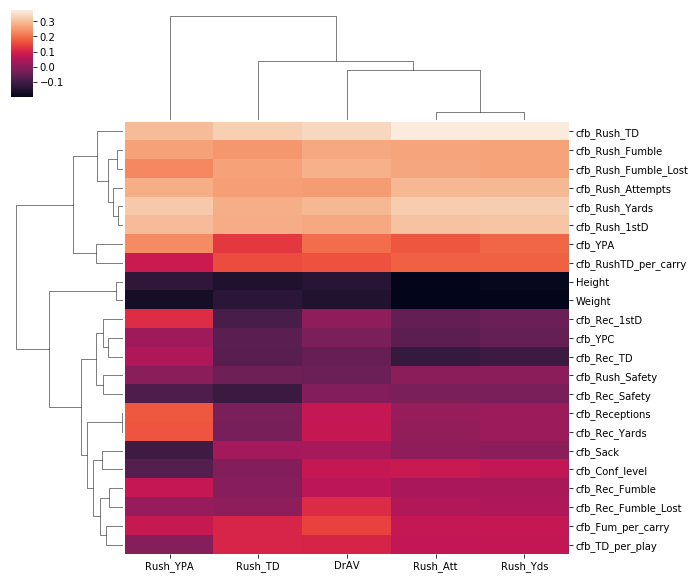

In [70]:
sns.clustermap(z_corr_cfb_id.loc[:,'DrAV':'Rush_TD'])

In [71]:
norm_feat_topCorr = {}
for row in z_corr_cfb_id.columns:
    norm_feat_topCorr[row] = z_corr_cfb_id.sort_values(by= row, ascending = False).ix[0:5,row]

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
npick_corr = z_played.loc[:, 'Rnd':].corr(method = 'spearman')
npick_corr_clean = npick_corr.loc['Height': 'cfb_Conf_level', 'Rnd':'St']
npick_corr_clean = npick_corr_clean.drop(labels=['Age', 'To'], axis=1)
npick_corr_clean
for row in npick_corr_clean.columns:
    norm_feat_topCorr[row] = npick_corr_clean.sort_values(by= row, ascending = False).ix[0:5,row]

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Regression with normalized data

In [73]:
# Again, try DrAV, this time with normalized data
model1 = smf.ols('DrAV ~ cfb_Rush_TD + cfb_Rush_Yards + cfb_Rush_1stD + cfb_Rush_Fumble_Lost', data=z_played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.924
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000915
Time:                        10:32:54   Log-Likelihood:                -218.88
No. Observations:                 161   AIC:                             447.8
Df Residuals:                     156   BIC:                             463.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.249e-17      0.075   1.65e-16      1.000      -0.149       0.149
cfb_Rush_TD              0.5439      0.202      2.695      0.008       0.145       0.942
cfb_Rush_Yards          -0.0504      0.416     -0.121      0.904      -0.872       0.771
cfb_Rush_1stD           -0.4173      0.406     -1.027      0.306      -1.220       0.386
cfb_Rush_Fumble_Lost     0.2701      0.101      2.678      0.008       0.071       0.469
==============================================================================
Omnibus:                       72.227   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.916
Skew:                           1.886   Prob(JB):                     5.25e-45
Kurtosis:                       7.021   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Still, Rush Yards and 1st Downs had high p-values, so I remove them from the model again
model1 = smf.ols('DrAV ~ cfb_Rush_TD+cfb_Rush_Fumble_Lost', data=z_played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.395
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000851
Time:                        10:32:54   Log-Likelihood:                -221.25
No. Observations:                 161   AIC:                             448.5
Df Residuals:                     158   BIC:                             457.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.077e-18      0.076   2.73e-17      1.000      -0.150       0.150
cfb_Rush_TD              0.1594      0.088      1.816      0.071      -0.014       0.333
cfb_Rush_Fumble_Lost     0.1784      0.088      2.033      0.044       0.005       0.352
==============================================================================
Omnibus:                       78.313   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.897
Skew:                           1.995   Prob(JB):                     5.44e-55
Kurtosis:                       7.618   Cond. No.                         1.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# same results as non-normalized
#continuing with models I tried before with non-normalized:
model1 = smf.ols('DrAV ~ cfb_Rush_TD+cfb_Rush_Yards+cfb_Receptions+cfb_Rush_Fumble', data=z_played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     5.176
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000609
Time:                        10:32:54   Log-Likelihood:                -218.42
No. Observations:                 161   AIC:                             446.8
Df Residuals:                     156   BIC:                             462.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.249e-17      0.075   1.66e-16      1.000      -0.149       0.149
cfb_Rush_TD         0.5198      0.196      2.655      0.009       0.133       0.907
cfb_Rush_Yards     -0.4773      0.225     -2.124      0.035      -0.921      -0.033
cfb_Receptions     -0.0111      0.084     -0.132      0.895      -0.177       0.154
cfb_Rush_Fumble     0.3215      0.106      3.043      0.003       0.113       0.530
==============================================================================
Omnibus:                       72.331   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.460
Skew:                           1.892   Prob(JB):                     6.60e-45
Kurtosis:                       7.001   Cond. No.                         6.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# p-value for cfb_Receptions > 0.5, so remove it
model1 = smf.ols('DrAV ~ cfb_Rush_TD + cfb_Rush_Yards + cfb_Rush_Fumble', data=z_played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DrAV   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     6.939
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000205
Time:                        10:32:54   Log-Likelihood:                -218.43
No. Observations:                 161   AIC:                             444.9
Df Residuals:                     157   BIC:                             457.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.249e-17      0.075   1.66e-16      1.000      -0.148       0.148
cfb_Rush_TD         0.5181      0.195      2.660      0.009       0.133       0.903
cfb_Rush_Yards     -0.4813      0.222     -2.168      0.032      -0.920      -0.043
cfb_Rush_Fumble     0.3228      0.105      3.078      0.002       0.116       0.530
==============================================================================
Omnibus:                       72.426   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.974
Skew:                           1.894   Prob(JB):                     5.10e-45
Kurtosis:                       7.006   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

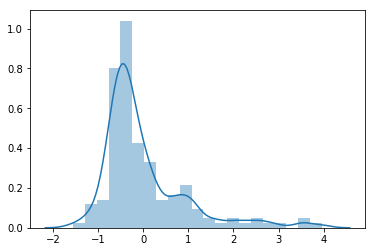

In [77]:
# Histogram
sns.distplot(model1.resid, kde=True)

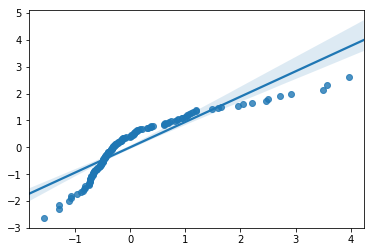

In [78]:
# QQ plot of the residuals (since this is the best model)
qntls, xr = stats.probplot(model1.resid, fit=False)
sns.regplot(xr,qntls)

Text(0.5,0,'i')

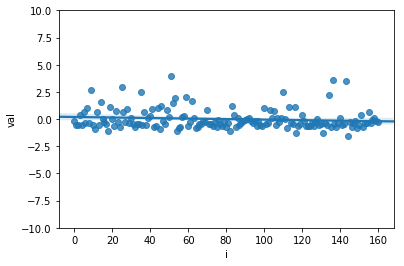

In [79]:
#Run sequence
ax = sns.regplot(np.arange(len(model1.resid)),model1.resid)
ax.set_ylim(-10,10)
ax.set_ylabel("val")
ax.set_xlabel("i")

Text(0.5,0,'y_i')

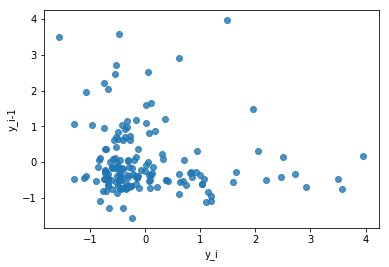

In [80]:
# lag plot
lag = model1.resid
lag = np.array(lag[:-1])
current = model1.resid[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

In [81]:
# Try predicting round, with normalized data this time

#using top correlations
model1 = smf.ols('Rnd ~ Height+Weight+cfb_Rec_1stD+cfb_Rec_TD+cfb_Receptions', data=z_played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rnd   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.3099
Date:                Wed, 18 Apr 2018   Prob (F-statistic):              0.906
Time:                        10:32:55   Log-Likelihood:                -336.95
No. Observations:                 161   AIC:                             685.9
Df Residuals:                     155   BIC:                             704.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0248      0.158     25.541      0.000       3.714       4.336
Height             0.0226      1.385      0.016      0.987      -2.713       2.758
Weight             0.1741      1.380      0.126      0.900      -2.553       2.901
cfb_Rec_1stD       0.1036      0.533      0.194      0.846      -0.949       1.156
cfb_Rec_TD        -0.0553      0.252     -0.220      0.826      -0.553       0.442
cfb_Receptions    -0.0907      0.475     -0.191      0.849      -1.029       0.847
==============================================================================
Omnibus:                       80.457   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.177
Skew:                           0.002   Prob(JB):                      0.00617
Kurtosis:                       1.768   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# all have high p-values again, so still is not a good model

model1 = smf.ols('Rnd ~ cfb_Rush_TD + cfb_YPA + cfb_YPC', data=z_played).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rnd   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     5.854
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000814
Time:                        10:32:55   Log-Likelihood:                -329.21
No. Observations:                 161   AIC:                             666.4
Df Residuals:                     157   BIC:                             678.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0248      0.149     26.970      0.000       3.730       4.320
cfb_Rush_TD    -0.5440      0.151     -3.599      0.000      -0.843      -0.245
cfb_YPA        -0.2386      0.154     -1.552      0.123      -0.542       0.065
cfb_YPC         0.0587      0.152      0.386      0.700      -0.241       0.358
==============================================================================
Omnibus:                       55.490   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.086
Skew:                          -0.037   Prob(JB):                       0.0106
Kurtosis:                       1.839   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# same model as before, but with normalized data
model1 = smf.ols('Rnd ~ cfb_Rush_TD + Height + Weight', data=z_played).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Rnd   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     6.892
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           0.000217
Time:                        10:32:55   Log-Likelihood:                -327.79
No. Observations:                 161   AIC:                             663.6
Df Residuals:                     157   BIC:                             675.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0248      0.148     27.210      0.000       3.733       4.317
cfb_Rush_TD    -0.6845      0.157     -4.361      0.000      -0.994      -0.374
Height          1.6299      1.293      1.261      0.209      -0.923       4.183
Weight         -1.3220      1.285     -1.029      0.305      -3.860       1.216
==============================================================================
Omnibus:                       33.122   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.466
Skew:                           0.025   Prob(JB):                       0.0239
Kurtosis:                       1.946   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

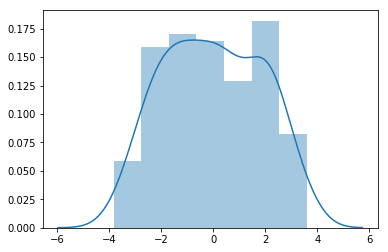

In [84]:
# Histogram
sns.distplot(model1.resid, kde=True)

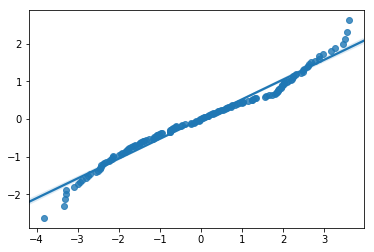

In [85]:
# QQ plot of the residuals (since this is the best model)
qntls, xr = stats.probplot(model1.resid, fit=False)
sns.regplot(xr,qntls)

Text(0.5,0,'i')

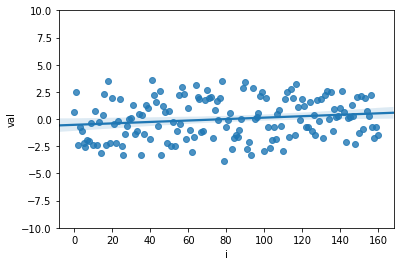

In [86]:
# Run sequence
ax = sns.regplot(np.arange(len(model1.resid)),model1.resid)
ax.set_ylim(-10,10)
ax.set_ylabel("val")
ax.set_xlabel("i")

Text(0.5,0,'y_i')

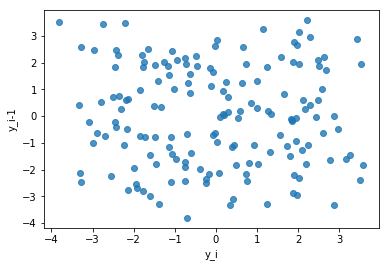

In [87]:
# lag plot
lag = model1.resid
lag = np.array(lag[:-1])
current = model1.resid[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

## Correlation & Regression Conclusion

After attempting numerous models with both non-normalized and normalized data, my analysis did not yield any models that could be used to reliably predict any NFL statistics from a player's statistical performance in college. Many models had high p-values for independent variables that were shown to have a high correlations with that dependent variable. Additionally, the highest R-squared that I achieved for any of my models was 0.117, meaning that only a small fraction of the variation in the data could be accounted for by the model. Since my intention in this analysis was to use these models to try and accurately predict NFL success/statistics for players, I conclude that the statistics found in my two datasets are ultimately not enough to be able to accurately predict Professional success, or even draft position (at least using regression).

## Classification

### Draft Round Classifier

In this section, I continue to pursue the goal I explored in the correlation/regression section above of trying to predict a player's potential draft round using their college performance statistics. Since I already know the classifications that I am seeking within my data, and I am using various independent variables to attempt to predict a dependent variable, I selected classification as the next step in exploring this goal of prediction (instead of clustering, for example). My first step in this process is to create a DataFrame of the desired features (college stats, not including those variables that are non-numeric or non-dummy variables). Then, I try creating a random forest classifier, followed by a Naive-Bayes classifier in order to ensure that neither of the two classifiers is extraordinarily more/less accurate (which would possibly indicate an error within one of the methods).

In [88]:
rnd_class = played.copy()

** Create new DataFrame of the desired features and drop those features that are not compatible with this analysis **

In [89]:
rnd_class = rnd_class.drop(labels=['cfb_Team', 'cfb_Conference', 'cfb_Subdivision', 'Pick', 'Tm', 'First4AV', 'Age',
       'To', 'AP1', 'PB', 'St'], axis=1)
rnd_class = rnd_class.loc[:, 'Rnd': 'cfb_Conf_level']

** Create dummy variable function to obtain labels for the draft rounds of each player **

In [90]:
def round_label(x):
    if x == 1:
        return 'one'
    elif x == 2:
        return 'two'
    elif x == 3:
        return 'three'
    elif x == 4:
        return 'four'
    elif x == 5:
        return 'five'
    elif x == 6:
        return 'six'
    else:
        return 'seven'

In [91]:
# apply labels and normalize data
rnd_class['Rnd'] = played['Rnd'].apply(func=round_label)
rnd_class = z_score(rnd_class)

Check that the function worked properly

In [92]:
rnd_class

,Rnd,Height,Weight,cfb_Rush_Attempts,cfb_Rush_Yards,cfb_YPA,cfb_Rush_TD,cfb_RushTD_per_carry,cfb_Rush_1stD,cfb_Sack,...,cfb_Receptions,cfb_Rec_Yards,cfb_YPC,cfb_Rec_TD,cfb_Rec_1stD,cfb_Rec_Fumble,cfb_Rec_Fumble_Lost,cfb_Rec_Safety,cfb_TD_per_play,cfb_Conf_level
0,four,0.911562,0.958099,0.656335,0.843279,0.334583,1.251646,0.397603,0.558773,-0.274308,...,0.580575,1.217161,1.064696,2.794429,0.740557,-0.645179,-0.549934,-0.079057,0.776073,1.306639
1,seven,0.883442,0.719375,-0.123580,0.223124,0.801365,-0.018407,0.040601,0.002806,-0.274308,...,0.490379,1.293497,1.388484,0.733804,0.883690,-0.645179,-0.549934,-0.079057,0.103825,1.306639
5,two,-1.056881,-1.047183,-0.740656,-0.991380,-0.848486,-1.076784,-0.718417,-0.865894,-0.274308,...,-1.253399,-1.185887,0.093382,-0.639945,-1.120171,-0.645179,-0.549934,-0.079057,-0.816581,1.306639
9,four,-1.056881,-1.047183,-1.670555,-1.655330,0.046124,-1.570694,-1.515806,-1.560853,-0.274308,...,-0.291314,-0.401156,-0.360799,0.733804,-0.332940,2.779233,2.729300,-0.079057,0.996224,-0.538702
10,three,-1.056881,-1.047183,0.004977,-0.088127,-0.135763,-0.582875,-0.597837,0.020180,-0.274308,...,-0.171054,-0.291233,-0.338482,-0.296508,-0.404506,-0.645179,-0.549934,-0.079057,-0.738964,-0.538702
11,one,0.911562,1.005843,0.699187,0.814344,0.226701,1.392763,0.458149,0.923627,-0.274308,...,0.370119,0.682811,0.588063,0.390367,0.024893,0.496292,1.089683,-0.079057,0.500933,-0.538702
12,one,0.939683,1.053588,0.557774,0.710333,0.292670,0.898854,0.229869,0.767261,-0.274308,...,0.610640,0.866017,0.445802,1.420679,0.668991,0.496292,-0.549934,-0.079057,0.381805,-0.538702
13,two,0.967804,0.977196,-0.230711,0.142574,0.913641,0.546061,0.756030,0.228668,-0.274308,...,-0.381510,-0.330927,0.090241,-0.296508,-0.404506,0.496292,1.089683,-0.079057,0.808249,-0.538702
14,two,-1.056881,-1.047183,-0.612098,-0.826371,-0.630319,-0.441758,0.101240,-0.726902,-0.274308,...,1.362269,1.269070,-0.037824,1.077242,1.527788,-0.645179,-0.549934,-0.079057,0.119429,1.306639
15,two,-1.056881,-1.047183,2.147601,2.116436,0.041051,1.886673,-0.068239,1.948692,-0.274308,...,-0.321380,-0.343141,-0.117563,-0.639945,-0.476073,-0.645179,-0.549934,-0.079057,-0.161904,1.306639


### Random Forest Classifier - Draft Rounds

In [93]:
import sklearn.ensemble as skens

msk = np.random.rand(len(rnd_class)) < 0.7
rnd_train = rnd_class[msk]
rnd_test = rnd_class[~msk]
#z_play_train

In [94]:
rf_model = skens.RandomForestClassifier(n_estimators=20, max_depth=3)
rf_model.fit(rnd_train.iloc[:,1:],rnd_train.Rnd)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
predicted_rnd = rf_model.predict(rnd_test.iloc[:,1:])
rnd_test['predicted_rf_tree'] = predicted_rnd

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


** Check accuracy of random forest classifier and identify key features **

In [96]:
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
skmetric.accuracy_score(y_true=rnd_test["Rnd"],y_pred=rnd_test['predicted_rf_tree'])

0.39583333333333331

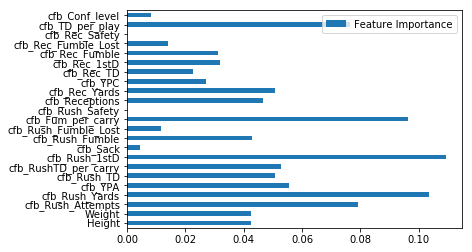

In [97]:
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=rnd_train.columns[1:]).plot(kind='barh')

### Naive-Bayes Classifier - Draft Round

In [98]:
gnb_model = sknb.GaussianNB()
gnb_model.fit(rnd_train.iloc[:,1:],rnd_train.Rnd)

y_pred = gnb_model.predict(rnd_test.iloc[:,1:-1])
rnd_test['predicted_nb_AllFeats'] = y_pred

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [99]:
skmetric.accuracy_score(y_true=rnd_test["Rnd"],y_pred=rnd_test['predicted_nb_AllFeats'])

0.16666666666666666

## Draft Round Classifier Conclusion

After building both the random forest and naive-bayes classifiers, I can conclude that classification cannot be used to accurately predict a player's future draft round based on the features of their college career performance. The random forest classifier yielded results that were extremely innacurate. The naive-bayes classifier was likewise very innacurate, although certainly much stronger than the random forest classifier. Ultimately, it seemse that the entropy of this dataset is too high to be able to accurately predict labels.

Issues complicating these classification attempts are: 1) there are many labels to classify observations into and 2) there simply may not be enough observations to accurately train a classifier to predict test observations.

## Pro Prediction Classifier

While I could not accurately use the features of college performance to predict the round a player would be drafted in, I wanted to see if I could at least use these features to predict whether or not a player would be drafted at all (in accordance with my second research question). In this section, I use the same features used in the classification models above to attempt to predict the dependent variable wasDrafted. Again, classification is the correct choice of methods in this case because I know the labels that I am attempting to find within my data, and I am using  independent variables to attempt to predict a dependent variable.  

** Create a DataFrame with the necessary features for classification, and apply the proper labels to each player **

In [100]:
# df_fin = all college
# drafts = all drafted RB's from 2006-14
df_cfb_RB = df_fin[df_fin['Position'] == 'RB']
df_cfb_RB['wasDrafted'] = df_cfb_RB['Name'].apply(func=draft_dummy)
df_cfb_RB.fillna(0, inplace=True)

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/zimmer/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [101]:
df_cfb_RB = df_cfb_RB.drop(labels=['Height', 'Weight','Team', 'Conference', 'Subdivision', 'Conference_num'], axis=1)

In [102]:
#normalize the data
cfb_RB_norm = z_score(df_cfb_RB)
new_cols = ['Name', 'Position', 'Rush_Attempts', 'Rush_Yards', 'Rush_TD',
       'Rush_1stD', 'Sack', 'Rush_Fumble', 'Rush_Fumble_Lost', 'Rush_Safety',
       'Receptions', 'Rec_Yards', 'Rec_TD', 'Rec_1stD', 'Rec_Fumble',
       'Rec_Fumble_Lost', 'Rec_Safety', 'conf_lev', 'wasDrafted']
cfb_RB_norm = cfb_RB_norm.ix[:, new_cols]

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


### Random Forest - Pro Predictor

In [103]:
msk1 = np.random.rand(len(cfb_RB_norm)) < 0.7
cfb_RB_train = cfb_RB_norm[msk1]
cfb_RB_test = cfb_RB_norm[~msk1]

In [104]:
rf_model = skens.RandomForestClassifier(n_estimators=20, max_depth=3)
rf_model.fit(cfb_RB_train.iloc[:,2:-1],cfb_RB_train.wasDrafted)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
predicted_labels = rf_model.predict(cfb_RB_test.iloc[:,2:-1])
cfb_RB_test['predicted_rf_tree'] = predicted_labels

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


** Check accuracy and important features **

In [106]:
skmetric.accuracy_score(y_true=cfb_RB_test["wasDrafted"],y_pred=cfb_RB_test['predicted_rf_tree'])

0.95048439181916033

Text(0.5,1,'Feature Importance of RF Classifier')

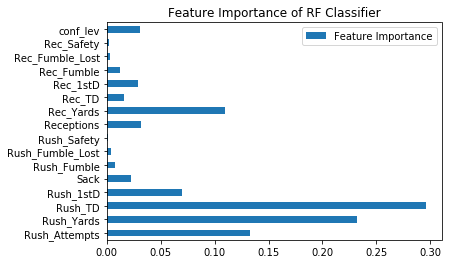

In [107]:
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=cfb_RB_train.columns[2:-1]).plot(kind='barh')
plt.title('Feature Importance of RF Classifier')

Text(91.68,0.5,'predicted label')

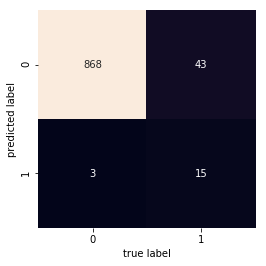

In [108]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(cfb_RB_test["wasDrafted"], cfb_RB_test['predicted_rf_tree'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Naive-Bayes Classifier - Pro Predictor

In [109]:
gnb_model = sknb.GaussianNB()
gnb_model.fit(cfb_RB_train.iloc[:,2:-1],cfb_RB_train.wasDrafted)

y_pred = gnb_model.predict(cfb_RB_test.iloc[:,2:-2])
cfb_RB_test['predicted_nb_AllFeats'] = y_pred

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


** Check Accuracy **

In [110]:
skmetric.accuracy_score(y_true=cfb_RB_test["wasDrafted"],y_pred=cfb_RB_test['predicted_nb_AllFeats'])

0.88051668460710442

Text(91.68,0.5,'predicted label')

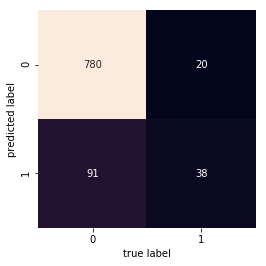

In [111]:
mat = confusion_matrix(cfb_RB_test["wasDrafted"], cfb_RB_test['predicted_nb_AllFeats'])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [112]:
# send dataframe of all pro prediction classifier results to csv for use in tableau
#cfb_RB_test[['Name', 'wasDrafted', 'predicted_rf_tree', 'predicted_nb_AllFeats']].set_index('Name').to_csv('pro_pred_classifier_res.csv')

### Pro Prediction Classifier: Conclusion

After building both the random forest and naive-bayes classifiers, I can conclude that classification can, in fact, be used to accurately predict whether a player will be drafted in the future based on the features of their college career performance. The random forest classifier yielded results that were extremely acurate, with an accuracy of roughly 95%. The naive-bayes classifier was likewise quite nacurate, although certainly weaker than the random forest classifier, with an accuracy of roughly 85%. While these are certainly good accuracy scores, much of the accuracy can likely be attributed to the significant size of the no label; the null accuracy for these classifiers is 70%, however, so they are still performing at accuracies of 15-25% above the null.

The key features that the random forest classifier found were as follows: Rushing 1st Downs, Rushing yards, Rushing Attempts, and Rushing Touchdowns.  While the first downs feature is a bit surprising, none of these appear to be shockingly out of place in terms of the context of this data. 

# Clustering Analysis for Draft Round

After my attempts at building a classifier for predicting players' draft rounds failed to produce a high level of accuracy, I decided to try clustering in order to see if players sharing a draft round or NFL success trajectory could be grouped based on similar college performance characteristics. If this were the case, I could potentially identify rough statistical thresholds for key features of player data to indicate the likelihood of a player to be drafted in a specific round/group of rounds or achieve a certain level of pro success. Since I wanted to identify clusters of players partitioned by into groups based on similar statistical bodies of college perfomance, and because I had a particular number of clusters to assume, I selected kmeans as my method of clustering analysis.

### Dimensionality Reduction

Before I began my clustering analysis, I decided that I should perform some dimensionality reduction on my dataset. Since many of the features of my data were quite correlated, I felt that reducing the dimensionality of my data using ** Principal Component Analysis ** would be helpful, as it would create independent variables that would increse the power of my analysis. Additionally, having already created a z-score DataFrame of the data I intended to use for clustering, I knew that I could use this to avoid issues with the sensitivity of the PCA to the different variances of the dataset features.

In [113]:
rd_clus = z_played.copy()
rd_clus = rd_clus.drop(labels=['cfb_Team', 'cfb_Conference', 'cfb_Subdivision', 'Pick', 'Tm', 'First4AV', 'Age',
       'To', 'AP1', 'PB', 'St'], axis=1)
#rd_clus = rd_clus.set_index('Name')
rd_clus = rd_clus.loc[:, 'Rnd': 'cfb_Conf_level']

In [114]:
rd_clus.head(5)

,Rnd,Height,Weight,cfb_Rush_Attempts,cfb_Rush_Yards,cfb_YPA,cfb_Rush_TD,cfb_RushTD_per_carry,cfb_Rush_1stD,cfb_Sack,...,cfb_Receptions,cfb_Rec_Yards,cfb_YPC,cfb_Rec_TD,cfb_Rec_1stD,cfb_Rec_Fumble,cfb_Rec_Fumble_Lost,cfb_Rec_Safety,cfb_TD_per_play,cfb_Conf_level
Name,,,,,,,,,,,,,,,,,,,,,
Robert Turbin,4.0,0.911562,0.958099,0.656335,0.843279,0.334583,1.251646,0.397603,0.558773,-0.274308,...,0.580575,1.217161,1.064696,2.794429,0.740557,-0.645179,-0.549934,-0.079057,0.776073,1.306639
Kerwynn Williams,7.0,0.883442,0.719375,-0.123580,0.223124,0.801365,-0.018407,0.040601,0.002806,-0.274308,...,0.490379,1.293497,1.388484,0.733804,0.883690,-0.645179,-0.549934,-0.079057,0.103825,1.306639
Ryan Williams,2.0,-1.056881,-1.047183,-0.740656,-0.991380,-0.848486,-1.076784,-0.718417,-0.865894,-0.274308,...,-1.253399,-1.185887,0.093382,-0.639945,-1.120171,-0.645179,-0.549934,-0.079057,-0.816581,1.306639
Le'Ron McClain,4.0,-1.056881,-1.047183,-1.670555,-1.655330,0.046124,-1.570694,-1.515806,-1.560853,-0.274308,...,-0.291314,-0.401156,-0.360799,0.733804,-0.332940,2.779233,2.729300,-0.079057,0.996224,-0.538702
Glen Coffee,3.0,-1.056881,-1.047183,0.004977,-0.088127,-0.135763,-0.582875,-0.597837,0.020180,-0.274308,...,-0.171054,-0.291233,-0.338482,-0.296508,-0.404506,-0.645179,-0.549934,-0.079057,-0.738964,-0.538702


** Create Principal Components **

In [115]:
from sklearn.cluster import KMeans
import sklearn.decomposition as skd
pca_model = skd.PCA().fit(rd_clus)
pca_model.components_.shape

(24, 24)

** Determine number of Principal Components to keep for analysis **

Text(0.5,1,'PCA Scree Plot')

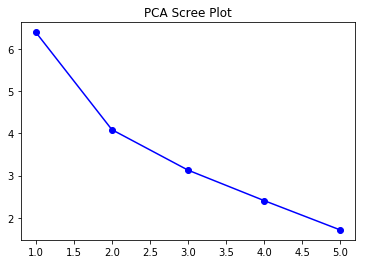

In [116]:
plt.plot(range(1,6),pca_model.explained_variance_[:5],'b-o')
plt.title('PCA Scree Plot')

In [117]:
# Keep 2 principal components
X = pca_model.transform(rd_clus)

In [118]:
pca_d = {}
ind = rd_clus.index
i = 0
for row in X[:,:2]:
    pca_d[ind[i]] = row
    i += 1

In [119]:
rnd_pca = pd.DataFrame.from_dict(pca_d, orient='index')
rnd_pca.columns = ['PC1', 'PC2']
rnd_pca = pd.merge(rnd_pca,rd_clus[['Rnd']], left_index=True, right_index=True)
rnd_pca['Rnd'] = rnd_pca['Rnd'].astype(int)

In [120]:
# Plot Players according to principal components, colored by round drafted
# Ideally, if my assumption holds true, might show concentrations of single
# colors in groupings/trends in the locations of colors
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
traces = []

for rnd in list(range(1,8)):

    trace = Scatter(
        x=rnd_pca[rnd_pca['Rnd'] == rnd]['PC1'],
        y=rnd_pca[rnd_pca['Rnd'] == rnd]['PC2'],
        mode='markers',
        name=rnd,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
py.iplot(fig)

While there is certainly a lot of overlap in the Principal Component measures of each draft round, first and second round draft picks are generally lower on PC2 and higher on PC1. Meanwhile, players drafted in rounds 5-7 are higher on PC2 and generally lower on PC1.

### K-means Clustering Analysis

### - 7 Clusters -

Set number of clusters to 7 - one for each round of the draft - and fit the kmeans model

In [121]:
import sklearn.cluster as skc
from sklearn.cluster import KMeans
kmeans_model = skc.KMeans(n_clusters=7)
kmeans_model.fit(rnd_pca[['PC1','PC2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [122]:
kmeans_model.labels_

array([0, 0, 5, 2, 3, 4, 4, 1, 3, 1, 5, 4, 4, 5, 1, 1, 0, 4, 0, 4, 0, 3, 1,
       2, 3, 4, 5, 3, 5, 3, 3, 2, 3, 3, 2, 5, 2, 5, 2, 2, 3, 0, 0, 0, 3, 0,
       5, 2, 3, 4, 0, 1, 6, 1, 4, 0, 6, 2, 2, 4, 0, 1, 1, 5, 2, 2, 0, 3, 2,
       2, 2, 3, 2, 1, 3, 0, 4, 0, 0, 1, 3, 2, 4, 1, 1, 3, 1, 1, 1, 4, 3, 1,
       4, 1, 2, 0, 3, 1, 3, 2, 1, 2, 6, 1, 3, 5, 1, 3, 3, 3, 5, 4, 3, 4, 3,
       2, 5, 4, 3, 1, 6, 2, 1, 2, 4, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 3, 4, 3,
       1, 3, 3, 2, 4, 3, 4, 4, 0, 3, 1, 3, 1, 3, 1, 0, 3, 5, 0, 5, 5, 5, 5], dtype=int32)

In [123]:
rnd_pca['cluster_labels_kmeans'] = kmeans_model.labels_

In [124]:
centroids = kmeans_model.cluster_centers_
centroids

array([[ 0.49828369,  2.7924386 ],
       [ 1.69599707, -2.05563014],
       [-3.50642378,  0.90961631],
       [-0.48777149,  0.01778876],
       [ 3.21068362, -0.01395632],
       [-2.50703395, -2.37709355],
       [ 4.62133059,  4.26791763]])

** Merge kmeans labels with player data to explore the accuracy of the clustering **

In [125]:
sev_cluster = rnd_pca.copy()
sev_cluster = sev_cluster.reset_index(drop=False)
sev_cluster = pd.pivot_table(sev_cluster, values='Name', index='Rnd', columns='cluster_labels_kmeans', aggfunc='count', fill_value=0)
sev_cluster

cluster_labels_kmeans,0,1,2,3,4,5,6
Rnd,,,,,,,
1,0,13,0,0,5,3,0
2,0,9,0,4,8,4,0
3,0,7,0,5,1,5,2
4,2,3,4,9,4,4,1
5,3,0,4,9,2,1,1
6,11,0,7,7,2,0,0
7,7,0,12,2,0,0,0


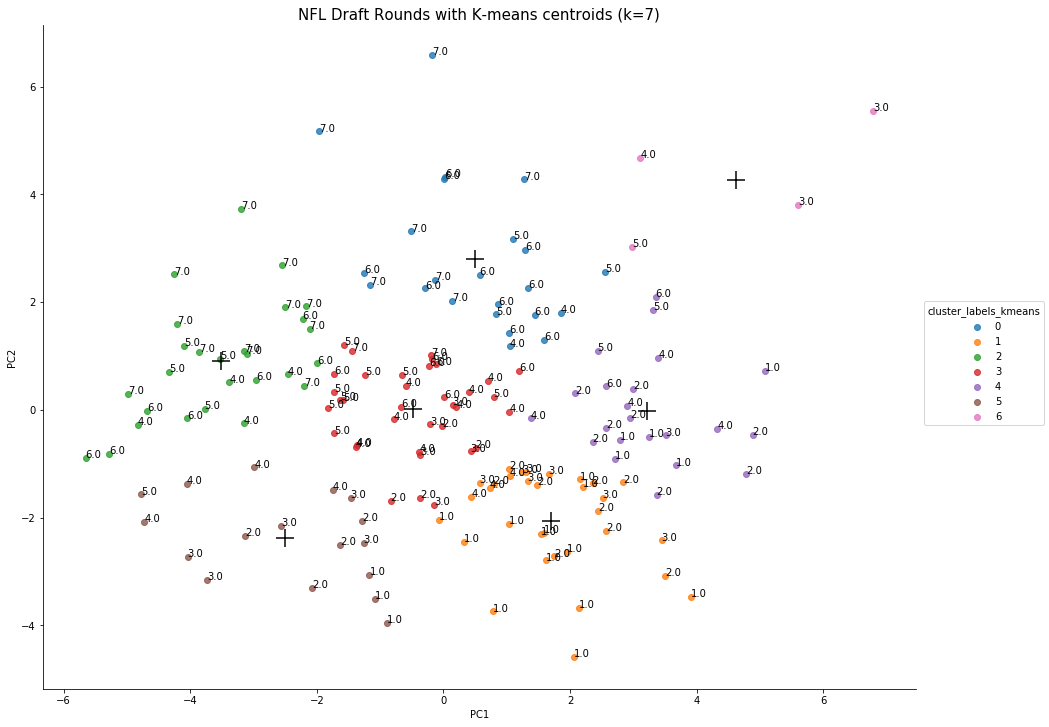

In [126]:
f = sns.lmplot(x='PC1', y='PC2', data=rnd_pca, hue='cluster_labels_kmeans',
               fit_reg=False, size=10, aspect=1.3)
f.ax.scatter(centroids[:,0], centroids[:,1], marker='+', s=300,
             linewidths=5, color='k');
plt.title('NFL Draft Rounds with K-means centroids (k=7)', fontsize=15)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(rnd_pca.PC1, rnd_pca.PC2, rnd_pca.Rnd, f.ax)


** As shown by the table and the graph above, the 7 cluster kmeans model was not very accurate outside of first round draft picks, as many players were placed in the incorrect cluster (kmeans cluster 0 should be round 1, and so on) ** 

### - 3 Clusters - 

While the kmeans employing 7 clusters was not accurate for most of the rounds, the accuracy of the first round predictions gave me hope; I wanted to try clustering based on smaller splits in the draft. I start with splitting the draft into thirds of rounds 1-3, 4 & 5, and 6 & 7 (while this doesn't exactly fit the 7 round structure of the draft since it doesn't split evenly into thirds, I wanted to try splitting the draft in half as well, so this was the lowest possible split between halves and all 7 rounds).

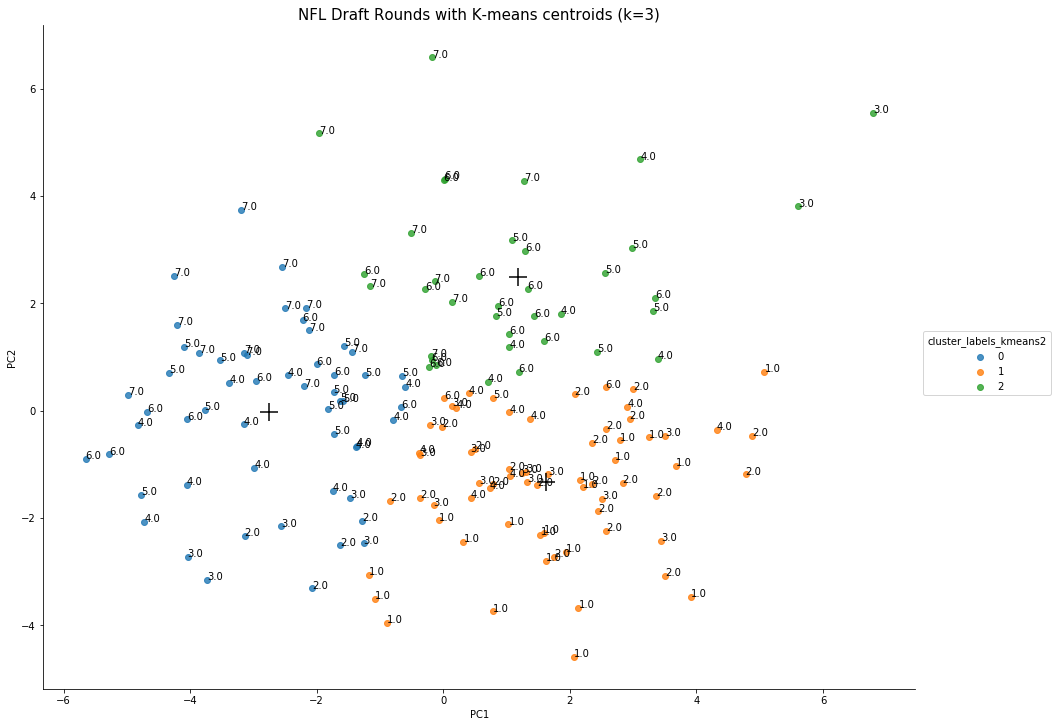

In [127]:
kmeans_model2 = skc.KMeans(n_clusters=3)
kmeans_model2.fit(rnd_pca[['PC1','PC2']])
rnd_pca['cluster_labels_kmeans2'] = kmeans_model2.labels_
centroids2 = kmeans_model2.cluster_centers_

f = sns.lmplot(x='PC1', y='PC2', data=rnd_pca, hue='cluster_labels_kmeans2',
               fit_reg=False, size=10, aspect=1.3)
f.ax.scatter(centroids2[:,0], centroids2[:,1], marker='+', s=300,
             linewidths=5, color='k');
plt.title('NFL Draft Rounds with K-means centroids (k=3)', fontsize=15)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(rnd_pca.PC1, rnd_pca.PC2, rnd_pca.Rnd, f.ax)

In [128]:
three_cluster = rnd_pca.copy()
three_cluster = three_cluster.reset_index(drop=False)
three_cluster = pd.pivot_table(three_cluster, values='Name', index='Rnd', columns='cluster_labels_kmeans2', aggfunc='count', fill_value=0)
three_cluster

cluster_labels_kmeans2,0,1,2
Rnd,,,
1,0,21,0
2,4,21,0
3,5,13,2
4,12,10,5
5,13,1,6
6,9,2,16
7,13,0,8


** While definitely not as accurate as I'd like, I was further encouraged by the accuracy of this model in predicting rounds 1 through 3 (the rounds I would identify as the first third of the draft). Many of the picks in this first-third  were correctly identified as such. However, the second third of the draft (roughly rounds 4 and 5), were not very precisely identified, and neither were the final third picks (rounds 6 and 7). However, the clustering analysis accurately avoided placing picks in rounds 5 - 7 in the first cluster, which signified potential for the first-half/second-half clustering that I planned to do after this clustering attempt. **

### - 2 clusters - 

To give these clusters some context, I would identify rounds 1-3 as the first half and rounds 4-7 as the second half.

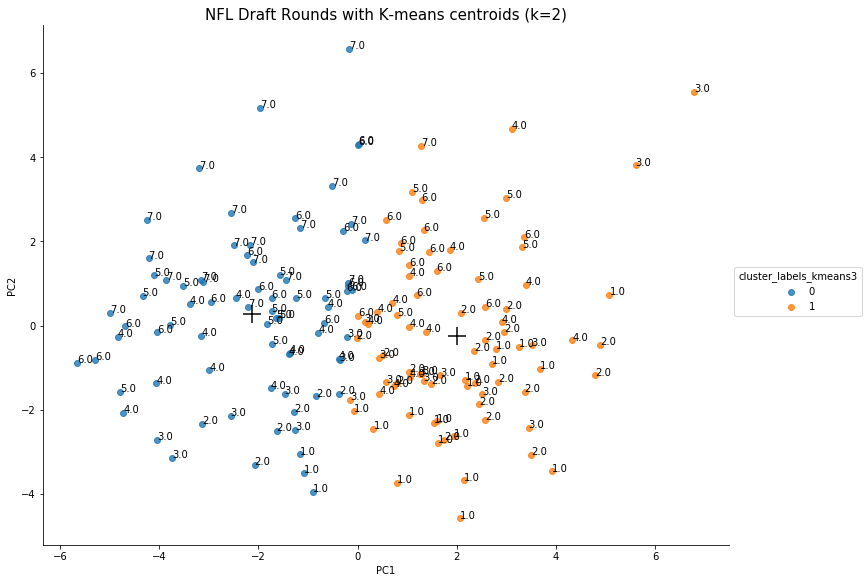

In [129]:
kmeans_model3 = skc.KMeans(n_clusters=2)
kmeans_model3.fit(rnd_pca[['PC1','PC2']])
rnd_pca['cluster_labels_kmeans3'] = kmeans_model3.labels_
centroids3 = kmeans_model3.cluster_centers_

f = sns.lmplot(x='PC1', y='PC2', data=rnd_pca, hue='cluster_labels_kmeans3',
               fit_reg=False, size=8, aspect=1.3)
f.ax.scatter(centroids3[:,0], centroids3[:,1], marker='+', s=300,
             linewidths=5, color='k');
plt.title('NFL Draft Rounds with K-means centroids (k=2)', fontsize=15)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(rnd_pca.PC1, rnd_pca.PC2, rnd_pca.Rnd, f.ax)

In [130]:
two_cluster = rnd_pca.copy()
two_cluster = two_cluster.reset_index(drop=False)
two_cluster = pd.pivot_table(two_cluster, values='Name', index='Rnd', columns='cluster_labels_kmeans3', aggfunc='count', fill_value=0)
two_cluster

cluster_labels_kmeans3,0,1
Rnd,,
1,3,18
2,6,19
3,7,13
4,13,14
5,13,7
6,16,11
7,20,1


In [131]:
# send dataframe of all clustering analysis results to csv for use in tableau
#rnd_pca.to_csv('round_pca_clustering.csv')

** Ultimately, I was disappointed in the results of this clustering. After the two previous clustering attempts (with 7 and 3 clusters), I had hoped that this clustering analysis would be more accurate than it was in reality. While I am happy with the clustering selections the model made for rounds 1, 2 and 7 (~85%, ~76%, and ~99% accurate, respectively), I was disappointed with the model's inability to predict the middle rounds. Round 3 and 5 predictions were ~65% accurate, which was solid in my opinion; Round 4 predictions were only about 50% accurate, which is honestly about as I expected considering that the number of labels divide by the number of clusters is 3.5. However, I was by far the most disappointed to see the round 6 predictions be only ~60% accurate, as I would've hoped that it would mirror the accuracy of the round 2 predictions since it is the same number of rounds removed from the extreme and the center as round 2. **

### Clustering Analysis Conclusions

This analysis shows that, while there is potential for using clustering to predict the future draft round of a player, more descriptive features may be needed. With the features I have in my data, I can quite accurately predict if a player will be drafted in the first round. Beyond that, however, individual round predictions are not accurate at all. Additionally, I can predict if a player will go 'early' or 'late' in the draft with admittedly mediocre accuracy; nonetheless, this clustering model is ultimately not useful in answering my research questions.

## More Clustering: Predicting CFB competition level from Professional Statistics 

Side question: Based on pro stats, can you tell what cfb division they came from (P5 = 1, G5 = 2, FCS = 3)? 

After running the above clustering analysis and concluding that it is ultimately not very helpful for answering my questions, I decided to explore the competition level aspect of my first question. I wanted to see if players coming from Power 5 programs were conclusively more successful at the next level than G5, and similarly if P5 and G5 players were more successful than FCS Players. In that vein, I decided to explore whether there were notable clusters of succesful players that came from any of these divisions.

In [132]:
played.head(5)

,Name,Position,Year,Rnd,Pick,Tm,Age,To,Height,Weight,...,Rush_YPA,Rush_TD,Rec,Rec_Yds,Rec_YPC,Rec_Td,TD_per_play,AP1,PB,St
0,Robert Turbin,RB,2012,4.0,106,SEA,22.0,2016,70.0,210.0,...,3.960396,4.0,66.0,545.0,8.257576,2.0,0.016260,0,0,0
1,Kerwynn Williams,RB,2013,7.0,230,IND,22.0,2016,69.0,185.0,...,4.850000,1.0,4.0,27.0,6.750000,0.0,0.011905,0,0,0
5,Ryan Williams,RB,2011,2.0,38,ARI,21.0,2012,0.0,0.0,...,2.827586,0.0,7.0,44.0,6.285714,0.0,0.000000,0,0,0
9,Le'Ron McClain,RB,2007,4.0,137,BAL,22.0,2013,0.0,0.0,...,3.700565,13.0,94.0,557.0,5.925532,3.0,0.035714,1,2,6
10,Glen Coffee,RB,2009,3.0,74,SFO,22.0,2009,0.0,0.0,...,2.722892,1.0,11.0,76.0,6.909091,0.0,0.010638,0,0,0


In [133]:
nm = played[['Name', 'cfb_Conf_level']].set_index('Name')
div_pca = pd.DataFrame.from_dict(pca_d, orient='index')
div_pca.columns = ['PC1', 'PC2']
div_pca = pd.merge(div_pca,nm[['cfb_Conf_level']], left_index=True, right_index=True)

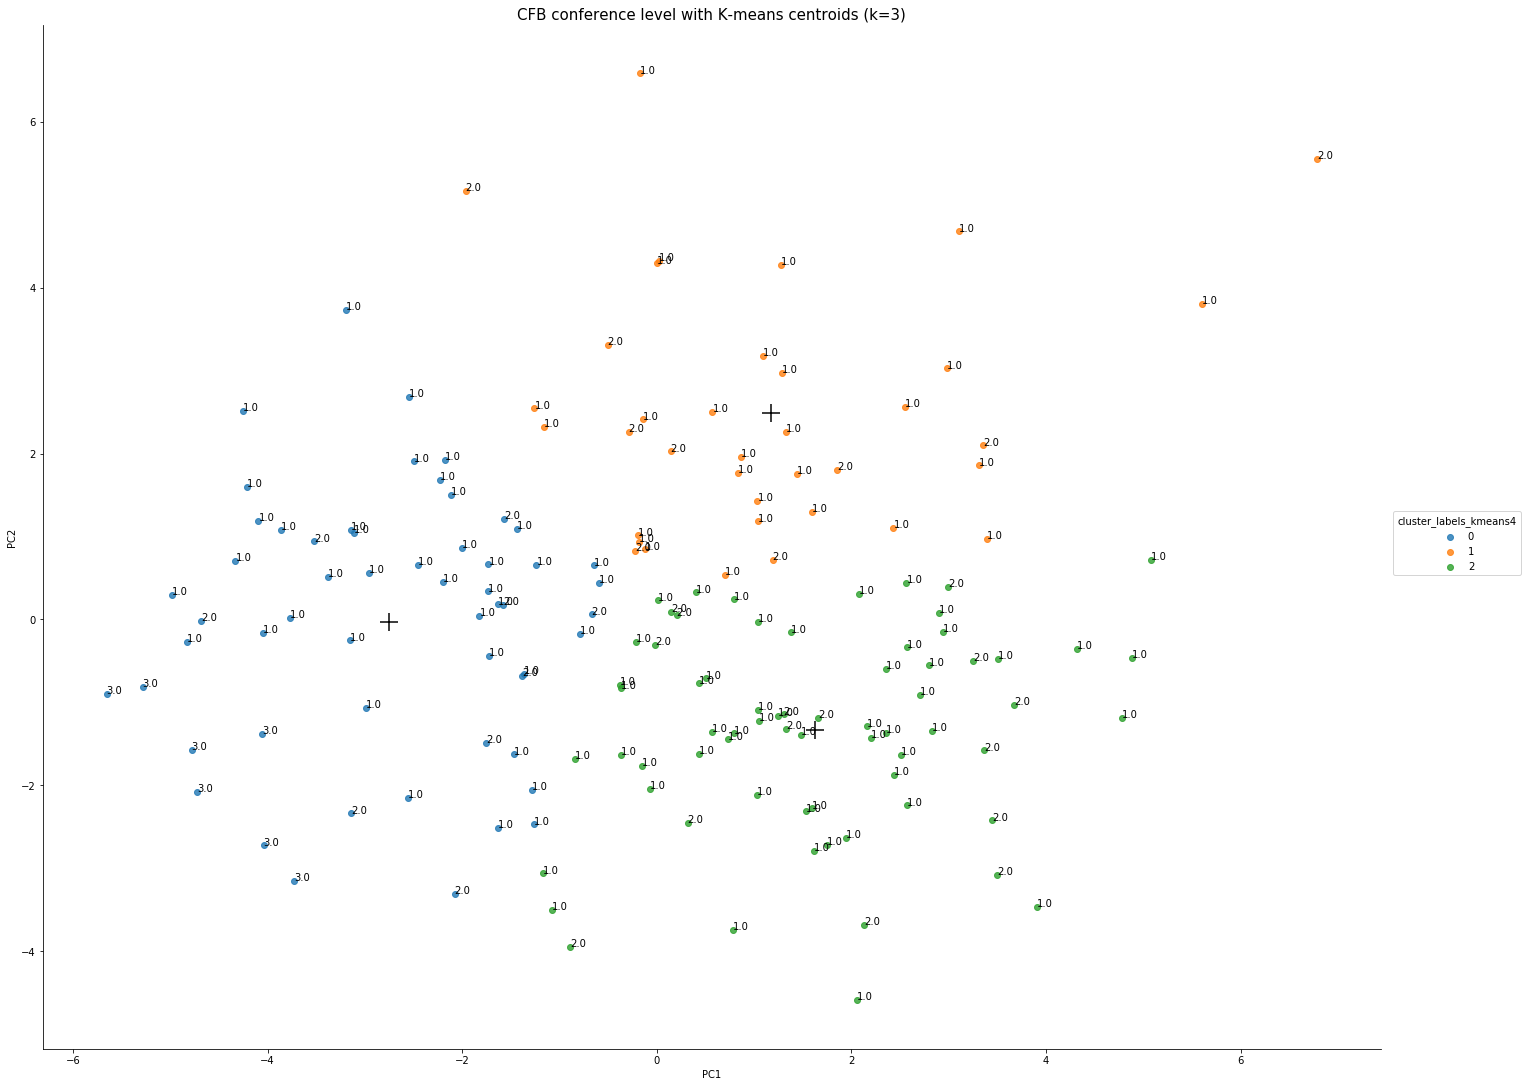

In [134]:
kmeans_model4 = skc.KMeans(n_clusters=3)
kmeans_model4.fit(div_pca[['PC1','PC2']])
div_pca['cluster_labels_kmeans4'] = kmeans_model4.labels_
centroids4 = kmeans_model4.cluster_centers_

f = sns.lmplot(x='PC1', y='PC2', data=div_pca, hue='cluster_labels_kmeans4',
               fit_reg=False, size=15, aspect=1.3)
f.ax.scatter(centroids4[:,0], centroids4[:,1], marker='+', s=300,
             linewidths=5, color='k');
plt.title('CFB conference level with K-means centroids (k=3)', fontsize=15)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(div_pca.PC1, div_pca.PC2, div_pca.cfb_Conf_level, f.ax)

In [135]:
conf_cluster = div_pca.copy()
conf_cluster = conf_cluster.reset_index(drop=False)
conf_cluster = pd.pivot_table(conf_cluster, values='Name', index='cfb_Conf_level', columns='cluster_labels_kmeans4', aggfunc='count', fill_value=0)
conf_cluster

cluster_labels_kmeans4,0,1,2
cfb_Conf_level,,,
1,40,28,53
2,9,9,15
3,7,0,0


### More Clustering: Predicting CFB competition level - Conclusions

Overall, this clustering analysis was simply not accurate. The clusters placed a roughly two-thirds of players from each competition level into the wrong cluster. In hindsight, this makes sense, since players from all competition levels succeed and fail with almost no consistent patterns.

## Cluster Analysis on College Draft Potential

After building a successful classifier, I was interested in seeing the comparison of clustering analysis to classification analysis through the lens of predicting whether a college player would go pro based on their college preformance. Admittedly, this section had little to do with answering my research questions, and more with to do with simply exploring the differences between classification and clustering. For that reason, graders can probably just skip this part, and I'll just give a quick conclusion here: classification was clearly much better at predicting if a player would go pro. I think that  the supervised aspect of classification - combined with the fact that the labels were known beforehand - is the main reason that the clustering was not nearly as effective.

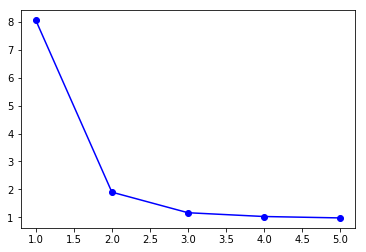

In [136]:
d_clus = cfb_RB_norm.copy()
d_clus = d_clus.drop(labels=['Position'], axis=1)
d_clus = d_clus.set_index('Name')
d_clus = d_clus.loc[:,: 'conf_lev']
pca_model = skd.PCA().fit(d_clus)
plt.plot(range(1,6),pca_model.explained_variance_[:5],'b-o')


In [137]:
# Keep 3 principal components
X2 = pca_model.transform(d_clus)
draft_pca = {}
ind2 = d_clus.index
i = 0
for row in X2[:,:3]:
    draft_pca[ind2[i]] = row
    i += 1

In [138]:
RB_norm = cfb_RB_norm.set_index('Name')
draft_pca = pd.DataFrame.from_dict(draft_pca, orient='index')
draft_pca.columns = ['PC1', 'PC2','PC3']
draft_pca = pd.merge(draft_pca,RB_norm[['wasDrafted']], left_index=True, right_index=True)
draft_pca.head(5)

,PC1,PC2,PC3,wasDrafted
A'mod Ned,4.429964,0.152497,-1.870210,No
A.J. Blue,1.673143,1.574626,-1.831445,No
A.J. Brooks,-0.806202,-0.470353,0.120789,No
A.J. Butler,-0.496955,0.537294,0.552603,No
A.J. Ellis,-0.779368,0.434042,0.566807,No


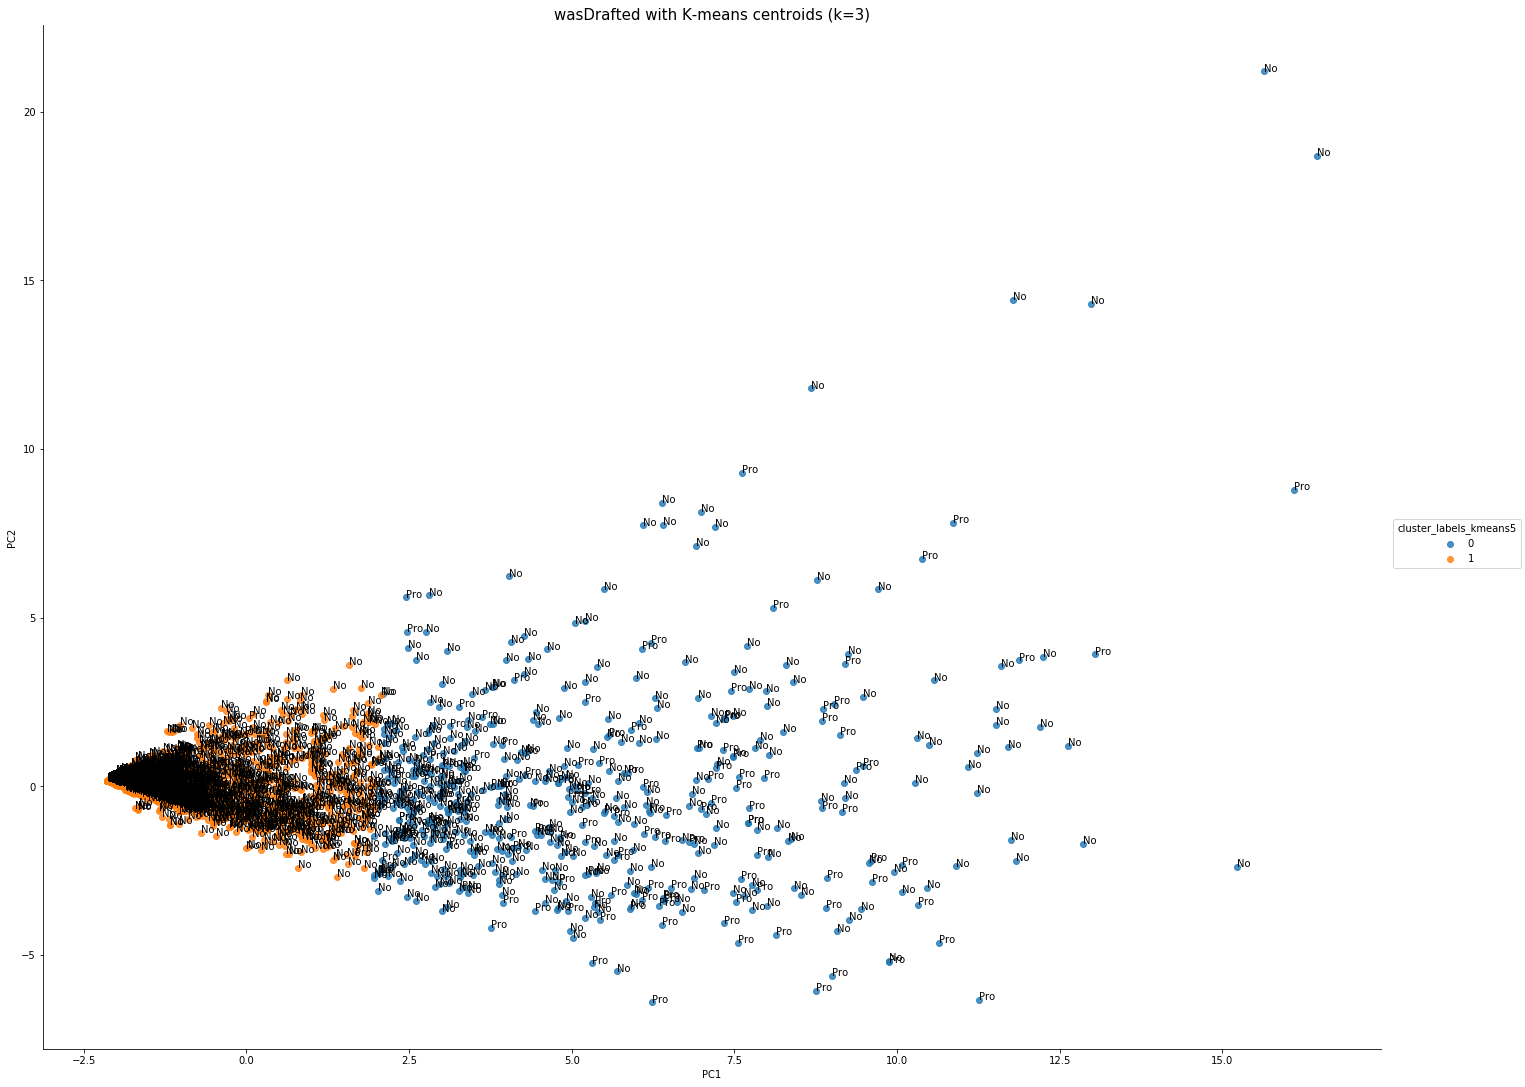

In [139]:
kmeans_model5 = skc.KMeans(n_clusters=2)
kmeans_model5.fit(draft_pca[['PC1','PC2', 'PC3']])
draft_pca['cluster_labels_kmeans5'] = kmeans_model5.labels_
centroids5 = kmeans_model5.cluster_centers_

f = sns.lmplot(x='PC1', y='PC2', data=draft_pca, hue='cluster_labels_kmeans5',
               fit_reg=False, size=15, aspect=1.3)
f.ax.scatter(centroids5[:,0], centroids5[:,1], marker='+', s=300,
             linewidths=5, color='k');
plt.title('wasDrafted with K-means centroids (k=3)', fontsize=15)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(draft_pca.PC1, draft_pca.PC2, draft_pca.wasDrafted, f.ax)

## Logistic Regression: What statistics are the most import influences on whether you get drafted or not?

In this section, I branch off of my initial research questions (since my findings in pursuing those concluded that there is simply not enough correlation between college and pro stats to make accurate predictions about pro success from college performance) to explore a related aspect of my second question; namely, I wanted to try to highlight the college statistics that were the best indicators of whether a player would go pro. This is similar to my second question, but instead of predicting pro success, I am simply predicting whether a player will be drafted and why. As a result, the findings of this regression could be used to determine which statistics are the most important to analyze as for why a player was drafted or not. I chose to use logistic regression because I am attempting to predict a dummy variable -  yes the player was drafted/no they were not drafted - based on its realtionship to a collection of dependent variables.

In [140]:
def draft_bin(x):
    if x == 'Pro':
        return 1
    else:
        return 0
    
def sub_dum(x):
    if x == 'FBS':
        return 1
    else:
        return 2

** Create dataframe for regression **

In [141]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
cfb_rb = cfb_RB_norm.copy()
cfb_rb['wasDrafted'] = cfb_rb['wasDrafted'].apply(func=draft_bin)
cfb_rb = cfb_rb.drop(labels=['Position', 'Name'], axis=1)

Below, I use the sklearn library to perform feature selection. The rfe.support_ list provides a list of boolean values (and ranks) of each of the features in my dataset: True means the feature was important to the model, while false means the feature was not.

In [142]:
logreg = LogisticRegression()
cfb_cols = cfb_rb.columns.values.tolist()
rfe = RFE(logreg)
rfe = rfe.fit(cfb_rb[cfb_cols],cfb_rb.wasDrafted)
TF_list = list(rfe.support_)
print(list(rfe.support_))
print(rfe.ranking_)

[True, True, True, False, False, True, False, False, True, False, True, False, False, False, False, True, True]
[ 1  1  1  4  3  1  9 10  1  2  1  5  8  7  6  1  1]


In [143]:
cf_cols = list(np.array(cfb_cols)[rfe.support_])
cf_cols

['Rush_Attempts',
 'Rush_Yards',
 'Rush_TD',
 'Rush_Fumble',
 'Receptions',
 'Rec_TD',
 'conf_lev',
 'wasDrafted']

In [144]:
Y = cfb_rb[cf_cols]
Y['wasDrafted'] = cfb_rb.wasDrafted
Y.head(5)

/Users/zimmer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Rush_Attempts,Rush_Yards,Rush_TD,Rush_Fumble,Receptions,Rec_TD,conf_lev,wasDrafted
Player Code,,,,,,,,
1,-0.087977,-0.234650,-0.131434,-0.240895,0.369352,-0.430699,0.153066,0
59102,-0.616646,-0.588458,-0.470823,-0.636256,-0.360755,0.107898,0.153066,0
75641,-0.610706,-0.613730,-0.583953,-0.636256,-0.604124,-0.430699,0.153066,0
75647,-0.408742,-0.487370,-0.244563,-0.636256,-0.117386,-0.430699,0.153066,0
75653,-0.539425,-0.572376,-0.470823,-0.240895,-0.360755,0.107898,0.153066,0


** Using the features taken from the feature selection method above, I build the model **

In [145]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_c = smf.logit('wasDrafted~Rush_Attempts+Rush_Yards+Rush_TD+Rush_Fumble+Receptions+Rec_TD+conf_lev',data=Y).fit()
model_c.summary()

Optimization terminated successfully.
         Current function value: 0.148390
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             wasDrafted   No. Observations:                 3010
Model:                          Logit   Df Residuals:                     3002
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Apr 2018   Pseudo R-squ.:                  0.3550
Time:                        10:33:07   Log-Likelihood:                -446.65
converged:                       True   LL-Null:                       -692.49
                                        LLR p-value:                4.933e-102
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.8307      0.155    -24.697      0.000      -4.135      -3.527
Rush_Attempts    -1.3926      0.373     -3.738      0.000      -2.123      -0.662
Rush_Yards        2.1684      0.387      5.602      0.000       1.410       2.927
Rush_TD           0.4739      0.154      3.070      0.002       0.171       0.776
Rush_Fumble      -0.2461      0.106     -2.321      0.020      -0.454      -0.038
Receptions       -0.2587      0.132     -1.953      0.051      -0.518       0.001
Rec_TD            0.3282      0.098      3.351      0.001       0.136       0.520
conf_lev         -0.8593      0.140     -6.141      0.000      -1.134      -0.585
=================================================================================
"""

### Checking Accuracy of the Regression Model

To test the accuracy of my regression model, I use the train_test_split method found in the sklearn library to split my data into train and test datasets with a 70/30 split.

In [146]:
Y1 = Y[['Rush_Attempts', 'Rush_Yards', 'Rush_TD', 'Rush_Fumble', 'Receptions',
       'Rec_TD', 'conf_lev']]
Y2 = Y['wasDrafted']

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
Y_train, Y_test, Y2_train, Y2_test = train_test_split(Y1, Y2, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(Y_train, Y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
Y2_pred = logreg.predict(Y_test)
print('Accuracy of logistic regression model: {:.2f}'.format(logreg.score(Y_test, Y2_test)))

Accuracy of logistic regression model: 0.94


The logistic regression model created above has an accuracy of 94%, which is exciting to see. However, in order to double check this accuracy measure, I use cross validation to check each of the 10 accuracy scores (as well as an average of all the scores to give a general accuracy number for comparison to the prediction accuracy score found above).

In [149]:
model = LogisticRegression()
acc = cross_val_score(model, Y_train, Y2_train, cv=10, scoring='accuracy')
acc

array([ 0.94312796,  0.9478673 ,  0.9478673 ,  0.94312796,  0.96208531,
        0.95260664,  0.94312796,  0.94285714,  0.95238095,  0.94285714])

In [150]:
print("10-fold cross validation average accuracy: %.3f" % (acc.mean()))

10-fold cross validation average accuracy: 0.948


Seeing as the average accuracy score of my cross validation is similar to the accuracy of my logistic regression model, I can conclude that the model holds.

In [151]:
# create dataframe for use in tableau
coef_df = pd.DataFrame([{'Rush_Attempts': -1.3926, 'Rush_Yards': 2.1684, 'Rush_TD':0.4739, 'Rush_Fumble':-0.2461, 'Receptions':-0.2587,'Rec_TD': 0.3282, 'conf_lev':-0.8593}])
coef_df = coef_df.transpose()
coef_df.columns = ['LogReg_Coefficient']
#coef_df.to_csv('pro_pred_logreg_coef.csv')
coef_df

,LogReg_Coefficient
Rec_TD,0.3282
Receptions,-0.2587
Rush_Attempts,-1.3926
Rush_Fumble,-0.2461
Rush_TD,0.4739
Rush_Yards,2.1684
conf_lev,-0.8593


## Logistic Regression Interpretation
### Null hypothesis: The coefficient of each independent variable is 0 (implying that the variable does not affect the dependent variable)

Checking the p-values of the independent variables included in the regression model, we see that all but receptions are below the threshold of 0.05. As a result, we can reject the null hypothesis and conclude that the other 6 independent variables - Number of rushing attempts, number of rushing yards, number of rushing touchdowns, number of rushing fumbles, number of receiving touchdowns, and their conference's competition level - have a significant influence on the dependent variable (whether the player was drafted or not). Of these independent variables, 3 have positive coefficients: Rush Yards, Rushing Touchdowns, and Recieving Touchdowns. A positive coefficient signifies that as the variable gets larger, the model is more likely to label the player as drafted; this follows the context of the variables, as good players are more likely to produce high numbers of rushing yards, as well as more points - both through the air and on the ground. This is the result of being effective players, which in turn means they will both have more opportunities to produce these stats as well as take advantage of those opportunities more often. On the other hand, 3 of the dependent variables have negative coefficients: Rushing attempts, Rushing Fumbles, and Conference (competition) level. Negative coefficients signify that, as the variable increases, the likelihood of the player being drafted gets smaller, which follows contextual intuition for this dataset: players that have more attempts will have more wear and tear on their bodies (taking more hits during the game means higher likelihood of injury), and players with more fumbles will be viewed as weaker prospects by NFL teams, as they do not protect the ball very well. Finally, since the numeric values given to conference level are 1 for top level (P5), 2 for mid-level (G5), and 3 for low-level (FCS), its negative coefficient makes sense, as it signifies that, as competition level decreases (meaning its numeric value increases), the likelihood of a player getting drafted shrinks. In conclusion, the prospects that are most likely to be drafted are those playing in the Power 5 with high rushing yards and touchdowns and low number of fumbles on a low number of attempts, and a high number of catching touchdowns.